# Tobigs 15기 Week2 Linear Regression - 15기 이성범

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.  
  = 중고차의 가격(단위: lakh(인도의 화페 단위))

< X > 
* Name : The brand and model of the car  
  = 자동차의 브랜드와 모델의 이름 -> 브랜드와 모델을 분리 가능할 듯  

* Location : The location in which the car is being sold or is available for purchase.  
  = 자동차를 구매하거나 판매할 수 있는 위치
  
* Year : The year or edition of the model.  
  = 자동차가 만들어진 연도 -> 최근일수록 좋을 가능성이 높아진다고 생각됨
  
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.  
  = 이전 소유자가 자동차로 운전한 거리(단위: KM) -> 낮을수록 좋을 가능성이 높아진다고 생각됨
  
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)  
  = 자동차 연료의 타입(Petrol, Diesel, Electric, CNG, LPG)

* Transmission : The type of transmission used by the car. (Automatic / Manual)  
  = 자동차 변속기 유형(Automatic / Manual)

* Owner_Type : Whether the ownership is Firsthand, Second hand or other.  
  = 소유권이 첫번째냐 두번째냐 (Firsthand, Second, other) -> 첫차면 그만큼 훼손이 많이 당했을 확률이 올라간다고 생각됨

* Mileage : The standard mileage offered by the car company in kmpl or km/kg  
  =  단위 연료 당 주행가능한 거리 (수소차 -> km/kg, 나머지 연료차 -> kmpl) -> 높을 수록 좋을 가능성이 높아진다고 생각됨
  
* Engine : The displacement volume of the engine in CC.  
  = 자동차의 배기량(단위: CC) -> 높을수록 좋을 가능성이 높아진다고 생각됨
    
* Power : The maximum power of the engine in bhp.  
  = 엔진의 최대 출력(단위: bhp) -> 높을수록 좋을 가능성이 높아진다고 생각됨

* Seats : The number of seats in the car.
  = 차에 탈 수 있는 사람의 수 -> 대형, 중형, 소형 등의 기준이 될 듯

* New_Price : The price of a new car of the same model.  
  = 동일한 모델의 신차의 가격(단위: Lakh , Cr) -> 단위를 통합해줘야 할 듯
  
주어진 데이터는 인도의 중고차와 관련된 데이터이며

따라서 우리는 중고 자동차의 상태를 기반으로 중고차의 가격을 예상하는 모델을 만들어야 함

## 번외 인도의 화폐 단위
- 1 = 1루피
- 10
- 100
- 1,000
- 10,000
- 100,000 -> 1 lakh (렉)
- 1,000,000 -> 10 lakh
- 10,000,000 -> 100 lakh -> 1 crore (코어)
- ...... -> 코어  
(참고: https://brunch.co.kr/@everythingisgag/159)



In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.drop('Unnamed: 0', inplace=True, axis=1) # 데이터 내부에 의미없는 칼럼 Unnamed: 0이 있어서 제거
tmp_data = data.copy() # 앞으로 데이터 전처리를 많이 해야하기 때문에 원본을 복사해둠
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 데이터 전처리

In [3]:
data.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
963,Skoda Superb Elegance 1.8 TSI AT,Mumbai,2012,95000,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,10.00
3881,Fiat Grande Punto 1.2 Dynamic,Kolkata,2011,25000,Petrol,Manual,Second,15.7 kmpl,1172 CC,67 bhp,5.0,NaN,1.25
4564,Hyundai Xcent 1.1 CRDi Base,Jaipur,2014,60000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,3.90
5325,Maruti Swift VDI,Kochi,2016,65210,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,5.48
5198,Maruti Ertiga VDI,Pune,2014,71899,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7.25
534,Hyundai Santa Fe 4X4,Coimbatore,2013,65278,Diesel,Manual,First,14.66 kmpl,2199 CC,194.3 bhp,7.0,NaN,8.36
1518,Honda City 1.5 V MT,Kolkata,2015,32000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,5.50
4765,Maruti Ertiga VXI,Mumbai,2014,69192,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,NaN,6.25
59,Maruti Zen Estilo VXI BSIII,Hyderabad,2010,39300,Petrol,Manual,First,18.2 kmpl,998 CC,67.1 bhp,5.0,NaN,2.25
1261,Hyundai i20 Asta 1.4 CRDi,Kochi,2015,46950,Diesel,Manual,First,21.27 kmpl,1396 CC,88.76 bhp,5.0,NaN,6.45


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


현재 데이터의 상태를 보면 
1. 수치형 변수로 해석 되야 할 칼럼이 단위에 의해 문자형으로 인식된다는 것을 알 수 있음 
2. Mileage ~ New_Price까지의 칼럼에 결측치가 존재한다는 것을 알 수 있음

따라서 앞으로 결측치를 채우고 수치형으로 인식되어야 할 문자형 칼럼들을 전처리 해주는 과정이 필요함

In [5]:
# Mileage의 변환 
# Mileage의 경우 띄어쓰기를 기준으로 값과 단위가 나뉘어진다는 것을 확인할 수 있음
data['Mileage'] = tmp_data.Mileage.map(lambda x : float(str(x).split()[0]))

# Engine의 변환
# Engine의 경우 띄어쓰기를 기준으로 값과 단위가 나뉘어진다는 것을 확인할 수 있음
data['Engine'] = tmp_data.Engine.map(lambda x : float(str(x).split()[0]))

# Power의 변환
# Power의 경우 띄어쓰기를 기준으로 값과 단위가 나뉘어진다는 것을 확인할 수 있음
# 또한 중간에 null이라는 값을 포함하기 때문에 이를 결측치로 따로 처리해줌
data['Power'] = tmp_data.Power.map(lambda x : str(x).split()[0]).map(lambda x : float(x) if x != "null" else np.nan)

# New_Price의 변환
# New_Price의 경우 띄어쓰기를 기준으로 값과 단위가 나뉘어진다는 것을 확인할 수 있음
# 하지만 단위에 따라 Lakh , Cr이 나뉘어 지기 때문에 단위가 Cr이라면 100을 곱해줌으로써 Lakh과 동일하게 변경
def get_New_Price(x):
    x = str(x)
    if x == 'nan' : return np.nan
    x_list = x.split()
    if x_list[1] == "Lakh": return float(x_list[0])
    return float(x_list[0]) * 100

data['New_Price'] = tmp_data['New_Price'].map(lambda x : get_New_Price(x))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


데이터 전처리 후 Power의 경우 결측치가 더 증가했으며 수치형으로 구분되어야할 변수가 제대로 구분되었다는 것을 확인할 수 있음

앞으로 EDA를 통해서 어떻게 결측치를 처리하고 어떤 새로운 feature을 만들지 아이디어를 도출할 예정

# EDA

#### 범주형 변수: Name, Location, Year(년도이기 때문에 범주형으로 처리), Fuel_Type, Transmission, Owner_Type, Seats(인승을 의미하기 때문에 범주형 자료로 판단함)

#### 수치형 변수: Kilometers_Driven, Mileage, Engine, Power, New_Price

#### Target 변수: Price

## 범주형 변수 확인

### Name

In [7]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [8]:
print('Name 개수: ', data['Name'].nunique())

Name 개수:  1876


Name 칼럼의 경우 데이터를 띄어쓰기를 기준으로 분리할 수 있으면 앞에 부분이 브랜드를 의미하고 뒤에 부분이 모델을 의미한다는 것을 알 수 있음

따라서 Name 칼럼을 분리하여 새로운 Brand 칼럼과 Model 칼럼을 만듬

In [9]:
data['Brand'] = tmp_data.Name.map(lambda x : x.split()[0])
data['Model'] = tmp_data.Name.map(lambda x :" ".join(x.split()[1:]))

In [10]:
data.groupby('Brand').mean().sort_values('Price', ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Brand,,,,,,,,
Lamborghini,2011.000000,6500.000000,6.400000,5204.000000,560.000000,2.000000,NaN,120.000000
Bentley,2006.000000,48000.000000,8.600000,5998.000000,552.000000,4.000000,NaN,59.000000
Porsche,2013.222222,40046.777778,13.515556,3479.666667,331.287500,4.055556,136.000000,48.348333
Land,2014.016667,59869.016667,10.959167,2475.719298,189.602105,5.403509,119.322000,39.259500
Jaguar,2014.400000,36380.725000,14.955750,2623.150000,239.075250,4.850000,58.135000,37.632250
Mini,2015.076923,24890.307692,18.593846,1766.615385,147.438462,4.423077,41.306250,26.896923
Mercedes-Benz,2013.550314,48766.745283,13.891761,2372.254717,193.579873,5.044025,73.713333,26.809874
Audi,2013.614407,53184.885593,15.171780,2281.758475,192.106043,5.262712,67.700417,25.537712
BMW,2013.056180,79489.363296,16.989700,2323.221374,209.819847,4.954198,60.636140,25.243146


In [11]:
print('Brand의 개수: ', data['Brand'].nunique())
print('Brand별 자동차의 개수: \n', data['Brand'].value_counts())

Brand의 개수:  31
Brand별 자동차의 개수: 
 Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Smart               1
Bentley             1
Ambassador          1
Isuzu               1
Name: Brand, dtype: int64


Text(0.5, 1.0, '평균 가격을 Brand별 자동차의 개수가 가장 많은 순으로 브랜드를 나열')

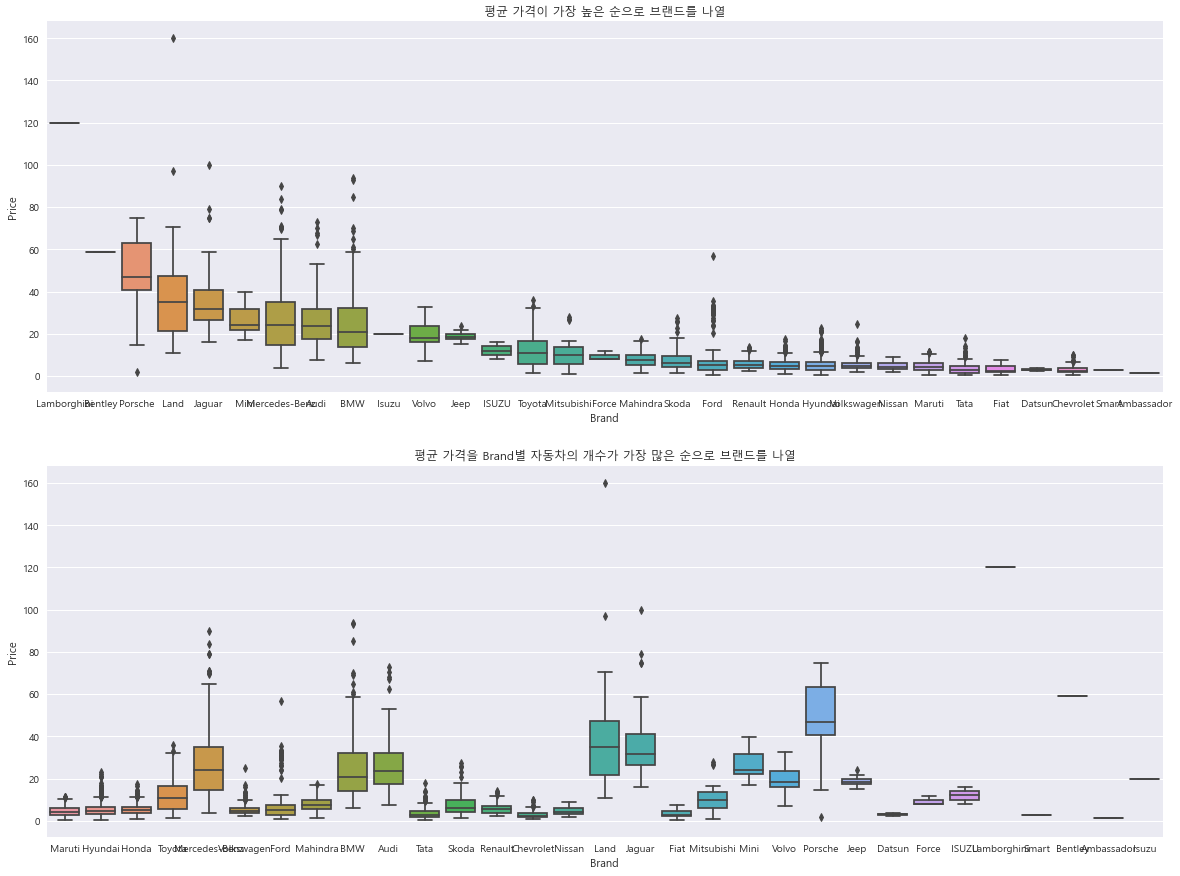

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Brand').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Brand', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 브랜드를 나열')

orders = data['Brand'].value_counts().index
sns.boxplot(data=data, y='Price', x='Brand', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Brand별 자동차의 개수가 가장 많은 순으로 브랜드를 나열')

브랜드별로 충분히 가격의 차이가 존재하기 때문에 활용할 수 있는 변수이며 모델의 수가 많이 존재하는 자동차의 가격이 상대적으로 낮다는 것을 확인할 수 있다.

In [13]:
print('Model 개수: ', data['Model'].nunique())
print('Model별 자동차의 개수: \n', data['Model'].value_counts())

Model 개수:  1876
Model별 자동차의 개수: 
 XUV500 W8 2WD                           49
Swift VDI                               45
Swift Dzire VDI                         34
City 1.5 S MT                           34
Swift VDI BSIV                          31
                                        ..
5 Series 2013-2017 520d M Sport          1
E-Class 2009-2013 E 200 CGI Elegance     1
E-Class 2015-2017 E350 Edition E         1
Innova Crysta 2.7 GX MT                  1
Etios VD SP                              1
Name: Model, Length: 1876, dtype: int64


Name 칼럼의 그 수치가 원핫인코딩을 하기에는 너무 많기 때문에 Brand 칼럼과 Model 칼럼으로 새롭게 분리하였는데

Brand 칼럼의 경우 31개의 브랜드로 줄어들었고 Brand 그 자체로도 충분히 활용가능한 좋은 변수임이 확인되었고

Model 칼럼의 경우 Name 칼럼과 동일한 1876개가 나왔기 때문에 활용 불가능한 변수임이 확인되었다.

따라서 최종적으로 Brand 칼럼을 모델에 활용할 예정이다.

### Location

In [14]:
print('Location 개수: ', data['Location'].nunique())
print('Location별 판매되는 자동차의 개수: \n', data['Location'].value_counts())

Location 개수:  11
Location별 판매되는 자동차의 개수: 
 Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


Text(0.5, 1.0, '평균 가격을 Location별 자동차가 판매되는 개수가 가장 많은 순으로 나열')

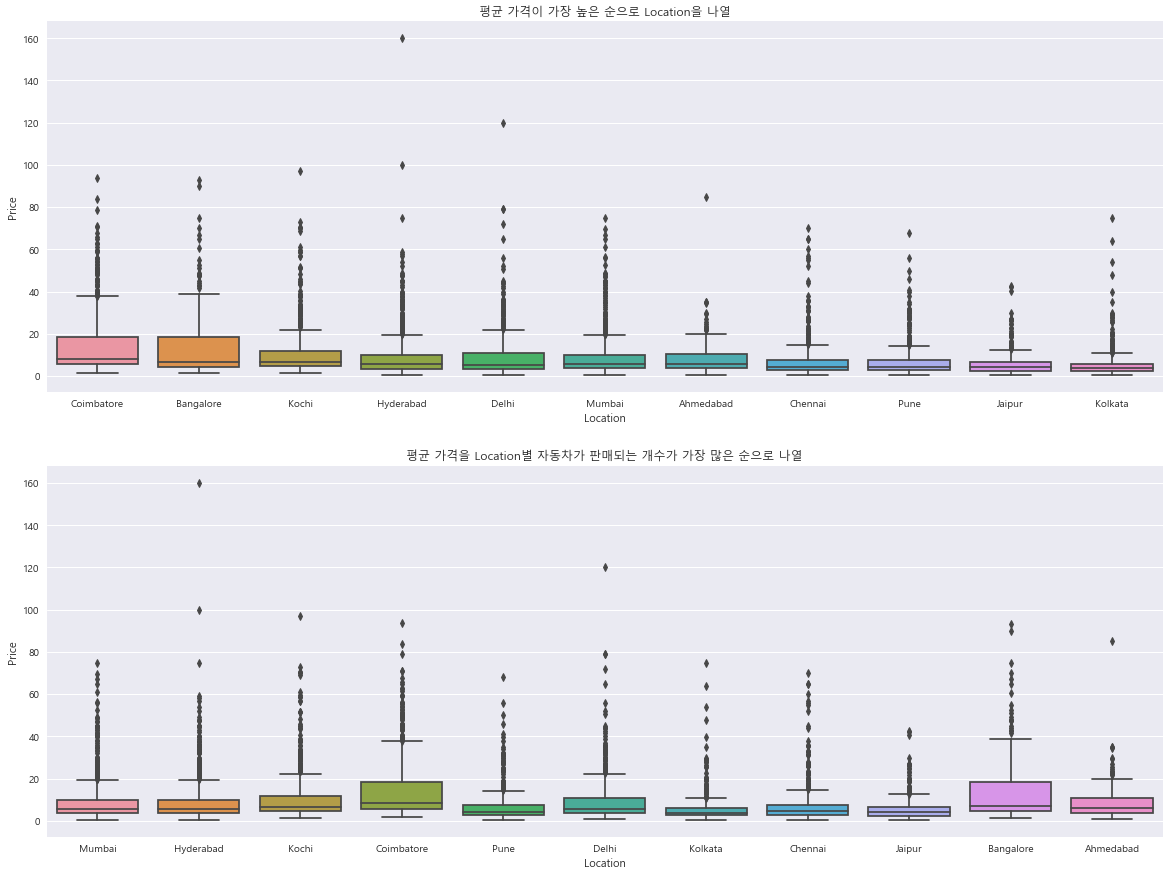

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Location').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Location', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Location을 나열')

orders = data['Location'].value_counts().index
sns.boxplot(data=data, y='Price', x='Location', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Location별 자동차가 판매되는 개수가 가장 많은 순으로 나열')

In [16]:
data.groupby(['Location','Brand']).count()

Name  Year  Kilometers_Driven  Fuel_Type  Transmission  \
Location  Brand                                                                
Ahmedabad Audi          10    10                 10         10            10   
          BMW           15    15                 15         15            15   
          Chevrolet      2     2                  2          2             2   
          Ford           3     3                  3          3             3   
          Honda         27    27                 27         27            27   
...                    ...   ...                ...        ...           ...   
Pune      Smart          1     1                  1          1             1   
          Tata          34    34                 34         34            34   
          Toyota        44    44                 44         44            44   
          Volkswagen    34    34                 34         34            34   
          Volvo          2     2                  2          2             2   

                      Owner_Type  Mileage  Engine  Power  Seats  New_Price  \
Location  Brand                                                              
Ahmedabad Audi                10       10      10     10     10          0   
          BMW                 15       15      15     15     15          6   
          Chevrolet            2        2       2      2      2          0   
          Ford                 3        3       3      3      3          1   
          Honda               27       27      26     26     26          3   
...                          ...      ...     ...    ...    ...        ...   
Pune      Smart                1        1       1      0      1          0   
          Tata                34       34      34     34     34          7   
          Toyota              44       44      43     40     43          6   
          Volkswagen          34       34      34     34     34          2   
          Volvo                2        2       2      2      2          0   

                      Price  Model  
Location  Brand                     
Ahmedabad Audi           10     10  
          BMW            15     15  
          Chevrolet       2      2  
          Ford            3      3  
          Honda          27     27  
...                     ...    ...  
Pune      Smart           1      1  
          Tata           34     34  
          Toyota         44     44  
          Volkswagen     34     34  
          Volvo           2      2  

[253 rows x 13 columns]

Location별로 판매되는 자동차의 가격 차이는 존재하나 개인적인 생각으로는 유의미한 변수인지는 잘 모르겠음

Location별로 판매되는 자동차의 종류에 따라서 가격의 차이가 존재한다고 생각하며 이를 시각화할려 했지만 데이터가 너무 많아 시각화를 하기에는 어려움이 따름

따라서 Location을 원핫인코딩하여 각 위치에 따라서 자동차의 종류에 따라서 가격을 분류하는 것을 모델이 스스로 판단하는 것이 더 좋을 것 같음

그 후 모델의 성능을 비교하여 Location을 반영 여부를 판단하는 것이 좋을 것 같음

### Year

In [17]:
print('Year 개수: ', data['Year'].nunique())
print('Year별 판매되는 자동차의 개수: \n', data['Year'].value_counts())

Year 개수:  22
Year별 판매되는 자동차의 개수: 
 2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64


Text(0.5, 1.0, '평균 가격을 Year별 자동차의 개수가 가장 많은 순으로 나열')

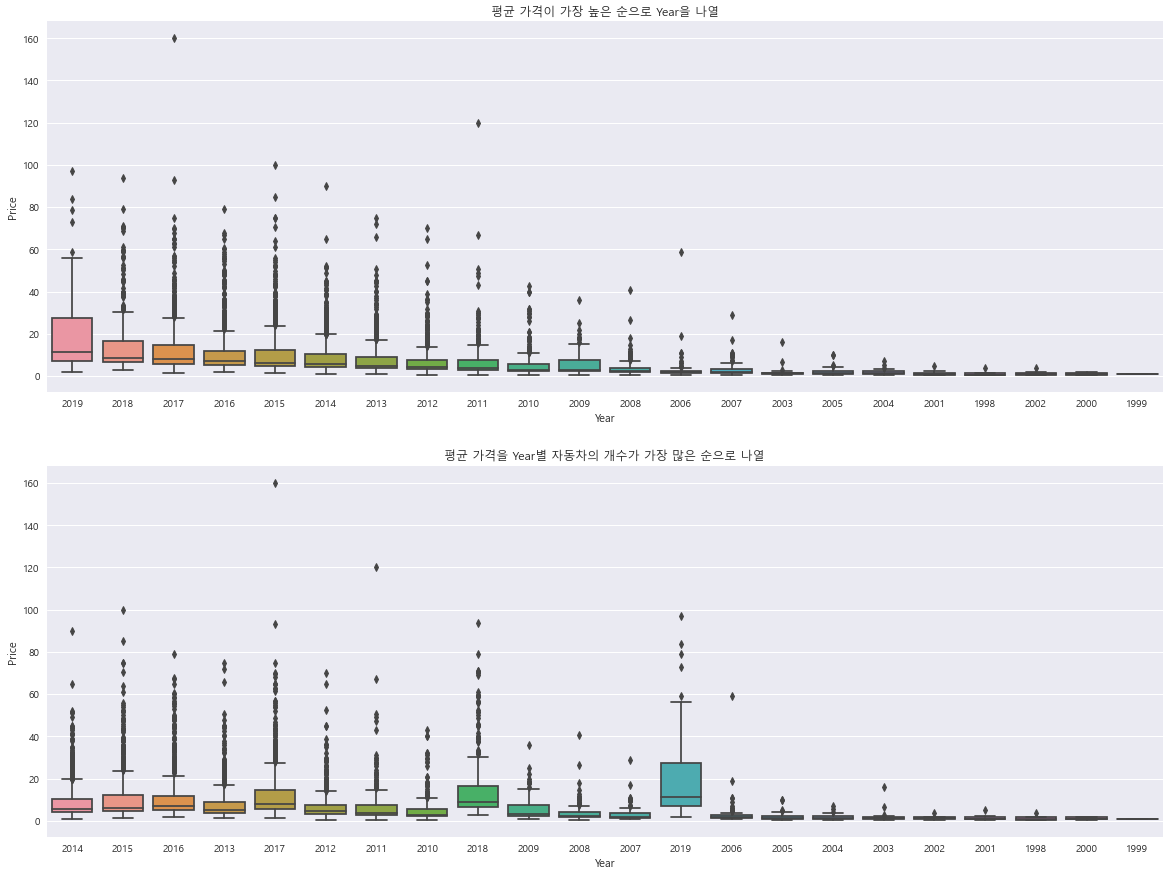

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Year').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Year', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Year을 나열')

orders = data['Year'].value_counts().index
sns.boxplot(data=data, y='Price', x='Year', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Year별 자동차의 개수가 가장 많은 순으로 나열')

확실히 신형으로 갈수록 자동차의 판매 가격이 높다는 것을 알 수 있음

따라서 year은 유의미한 변수로 작용된다는 것을 알 수 있음

### Fuel_Type

In [19]:
print('Fuel_Type 개수: ', data['Fuel_Type'].nunique())
print('Fuel_Type별 판매되는 자동차의 개수: \n', data['Fuel_Type'].value_counts())

Fuel_Type 개수:  5
Fuel_Type별 판매되는 자동차의 개수: 
 Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


Text(0.5, 1.0, '평균 가격을 Fuel_Type이 가장 많은 순으로 나열')

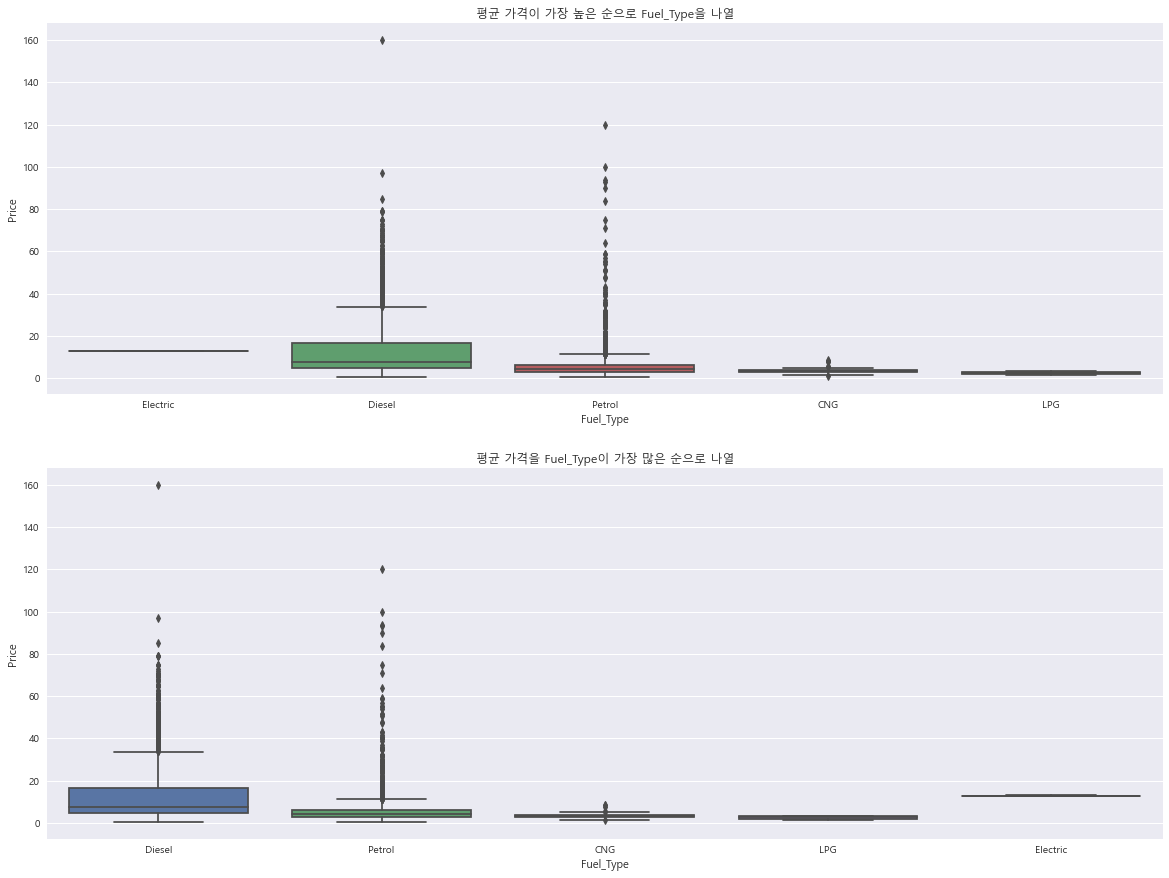

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Fuel_Type').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Fuel_Type', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Fuel_Type을 나열')

orders = data['Fuel_Type'].value_counts().index
sns.boxplot(data=data, y='Price', x='Fuel_Type', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Fuel_Type이 가장 많은 순으로 나열')

압도적으로 Diesel, Petrol을 사용하는 차량이 많으며 Diesel을 연료로 사용하는 차량의 가격이 상대적으로 비싸다는 것을 확인할 수 있음

또한 수소차, 전기차의 경우 인도에서는 많이 사용하지 않는다는 것을 확인할 수 있음

### Transmission

In [21]:
print('Transmission 개수: ', data['Transmission'].nunique())
print('Transmission별 판매되는 자동차의 개수: \n', data['Transmission'].value_counts())

Transmission 개수:  2
Transmission별 판매되는 자동차의 개수: 
 Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


Text(0.5, 1.0, '평균 가격을 Transmission이 가장 많은 순으로 나열')

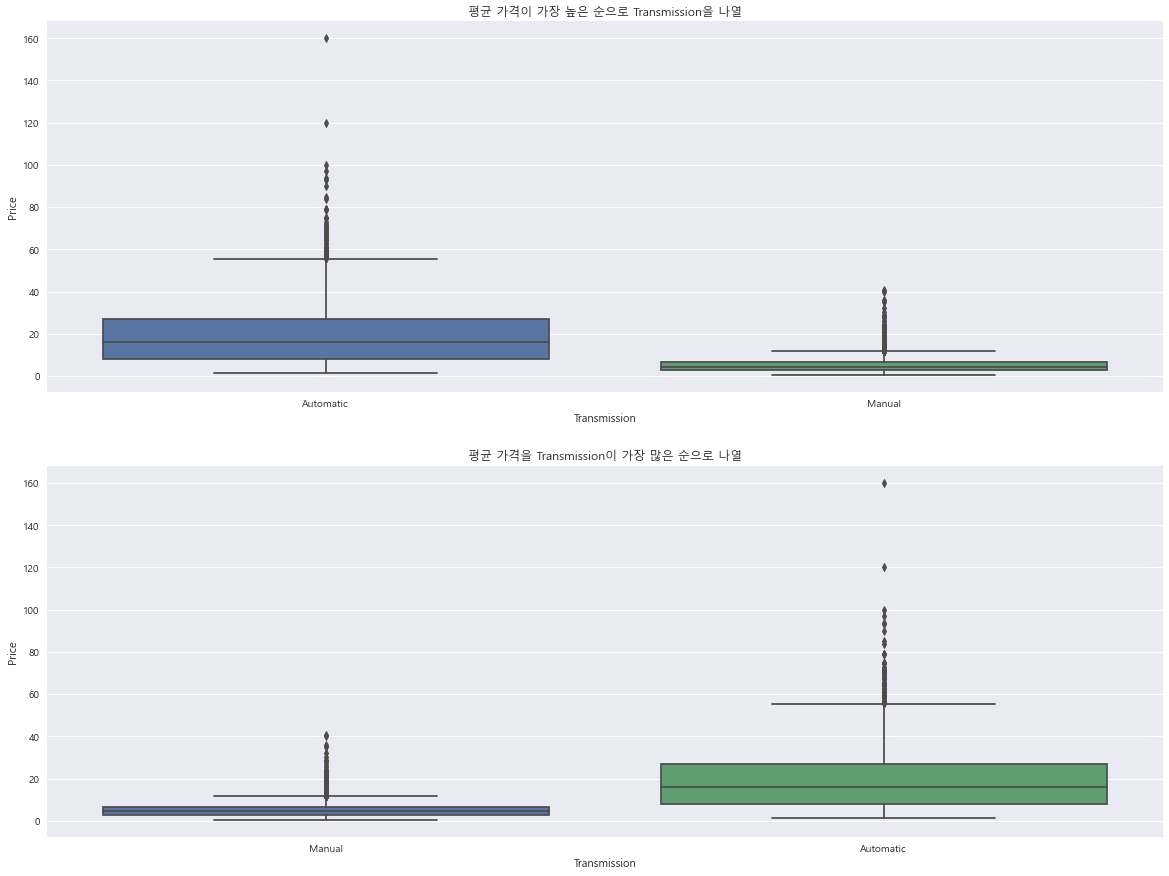

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Transmission').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Transmission', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Transmission을 나열')

orders = data['Transmission'].value_counts().index
sns.boxplot(data=data, y='Price', x='Transmission', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Transmission이 가장 많은 순으로 나열')

Automatic의 경우 Manual보다 상대적으로 가격이 비싸다는 것을 알 수 있음

### Owner_Type

In [23]:
print('Owner_Type 개수: ', data['Owner_Type'].nunique())
print('Owner_Type별 판매되는 자동차의 개수: \n', data['Owner_Type'].value_counts())

Owner_Type 개수:  4
Owner_Type별 판매되는 자동차의 개수: 
 First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


Text(0.5, 1.0, '평균 가격을 Owner_Type이 가장 많은 순으로 나열')

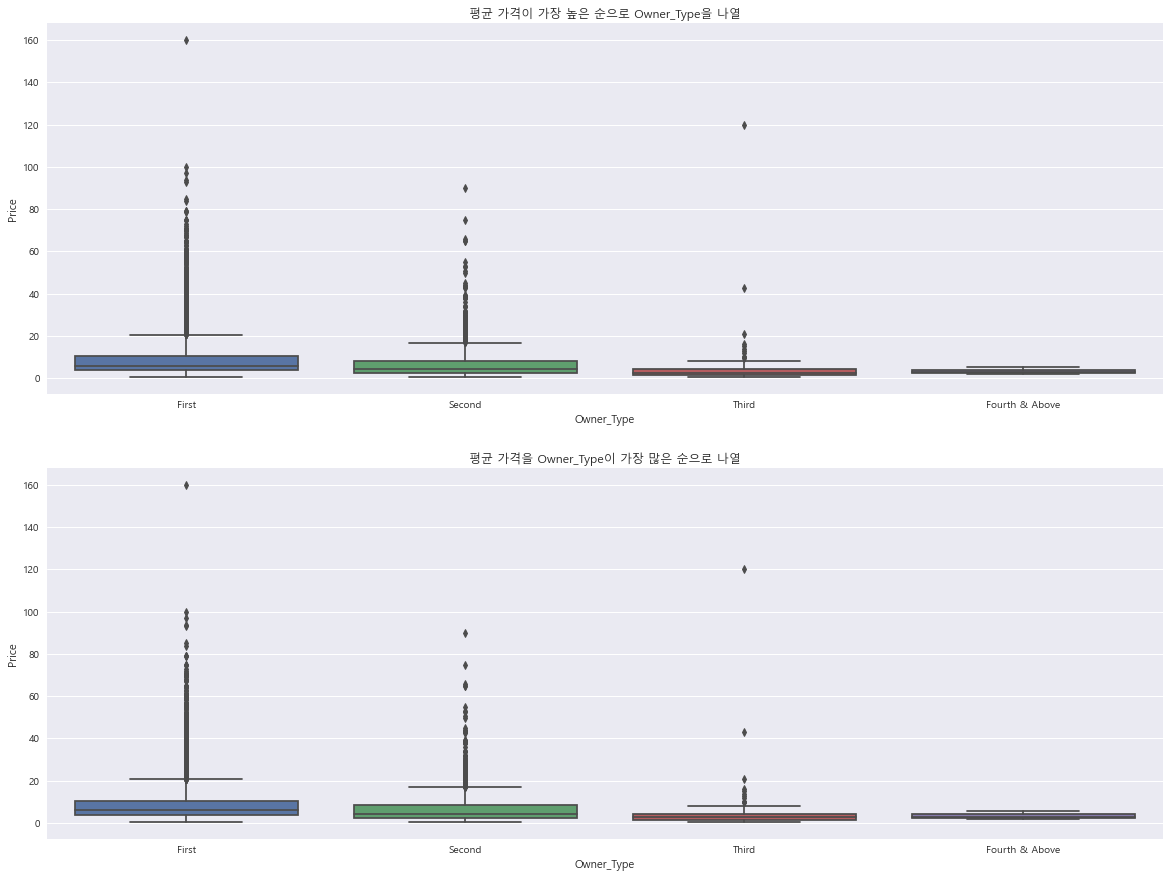

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Owner_Type').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Owner_Type', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Owner_Type을 나열')

orders = data['Owner_Type'].value_counts().index
sns.boxplot(data=data, y='Price', x='Owner_Type', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Owner_Type이 가장 많은 순으로 나열')

Text(0.5, 1.0, '평균 가격을 Owner_Type이 가장 많은 순으로 나열')

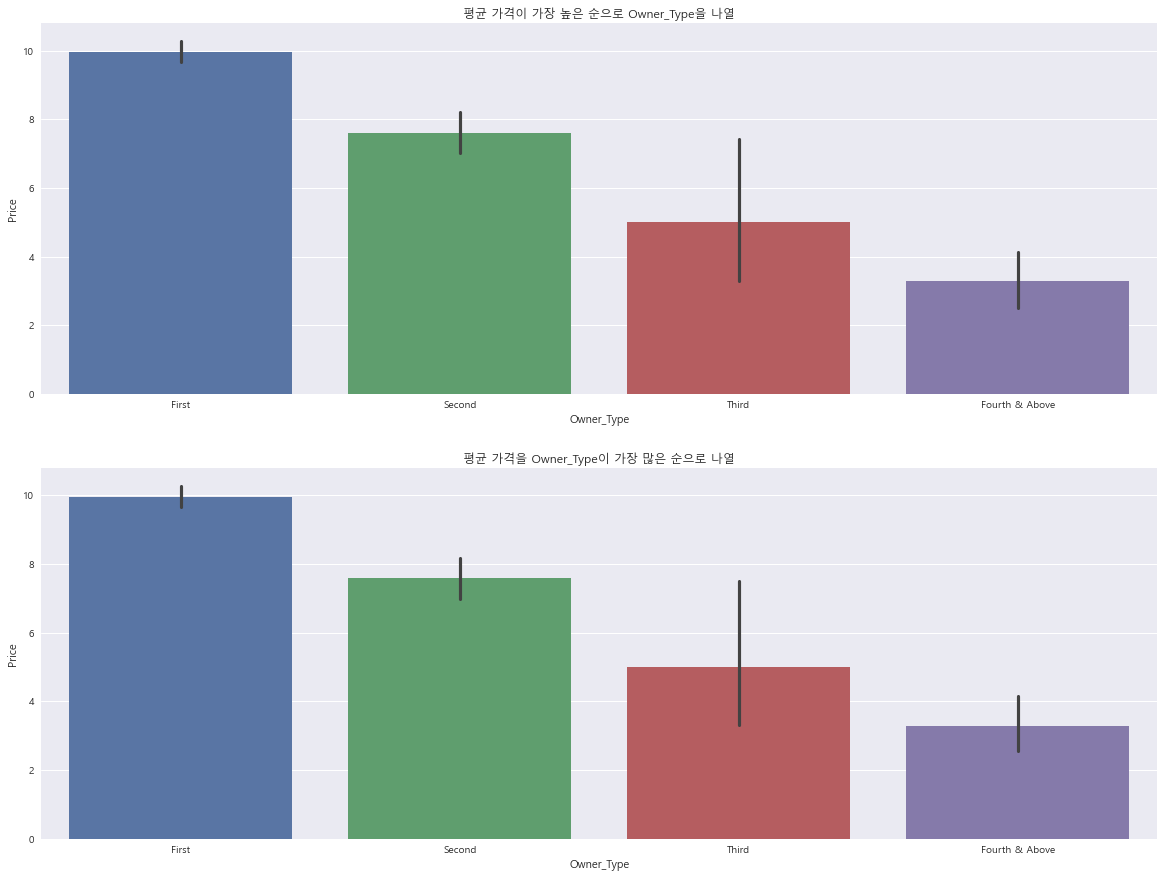

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Owner_Type').mean().sort_values('Price', ascending=False).index
sns.barplot(data=data, y='Price', x='Owner_Type', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Owner_Type을 나열')

orders = data['Owner_Type'].value_counts().index
sns.barplot(data=data, y='Price', x='Owner_Type', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Owner_Type이 가장 많은 순으로 나열')

소유권이 First일 수록 가격이 증가하는 경향을 보여줌 또한 First를 매물로 내놓은 자동차가 매우 많다는 것을 확인할 수 있음

그런데 개인적인 생각으로는 First 차량일 수록 많이 탔기 때문에 다른 차량을 구매하기 위해서 매물로 내놓은 경우가 많다고 생각되며 그 만큼 자동차의 종류가 많기 때문에 가격이 상승되었다고 생각함

따라서 개인적으로는 유의미한 변수라고 생각되지는 않음

### Seats

결측치 존재

In [26]:
print('Seats의 결측치 개수: ', data['Seats'].isnull().sum())
print('Seats의 개수: ', data['Seats'].nunique())
print('Seats별 판매되는 자동차의 개수: \n', data['Seats'].value_counts())

Seats의 결측치 개수:  42
Seats의 개수:  9
Seats별 판매되는 자동차의 개수: 
 5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


In [27]:
Seats_model_list = data[data['Seats'] == 0]['Model'].unique().tolist()
for model in Seats_model_list:
    print(data[data['Model'] == model]['Seats'])

3999    0.0
Name: Seats, dtype: float64


In [28]:
Seats_model_list = data[data['Seats'].isnull()]['Model'].unique().tolist()
for model in Seats_model_list:
    print(data[data['Model'] == model]['Seats'])

194     NaN
1385    NaN
3305    5.0
4767    5.0
5270    NaN
Name: Seats, dtype: float64
208    NaN
733    NaN
2335   NaN
2668   NaN
3404   NaN
5015   NaN
Name: Seats, dtype: float64
229   NaN
Name: Seats, dtype: float64
749    NaN
4152   NaN
Name: Seats, dtype: float64
1294   NaN
Name: Seats, dtype: float64
1327   NaN
Name: Seats, dtype: float64
1460   NaN
Name: Seats, dtype: float64
1279    5.0
1917    NaN
3721    5.0
3806    5.0
5957    5.0
Name: Seats, dtype: float64
2074   NaN
5185   NaN
Name: Seats, dtype: float64
2096   NaN
Name: Seats, dtype: float64
2264    NaN
4138    5.0
Name: Seats, dtype: float64
2325   NaN
Name: Seats, dtype: float64
2369   NaN
3882   NaN
5893   NaN
Name: Seats, dtype: float64
2530   NaN
2623   NaN
3272   NaN
3520   NaN
4577   NaN
Name: Seats, dtype: float64
2542   NaN
2780   NaN
2842   NaN
3522   NaN
Name: Seats, dtype: float64
2737   NaN
Name: Seats, dtype: float64
3800   NaN
Name: Seats, dtype: float64
3810   NaN
Name: Seats, dtype: float64
4011   NaN
N

In [29]:
data.loc[data['Seats'] == 0, 'Seats'] = 5
data.loc[data['Seats'].isnull(), 'Seats'] = 5

In [30]:
print('Seats의 결측치 개수: ', data['Seats'].isnull().sum())

Seats의 결측치 개수:  0


Text(0.5, 1.0, '평균 가격을 Seats가 가장 많은 순으로 나열')

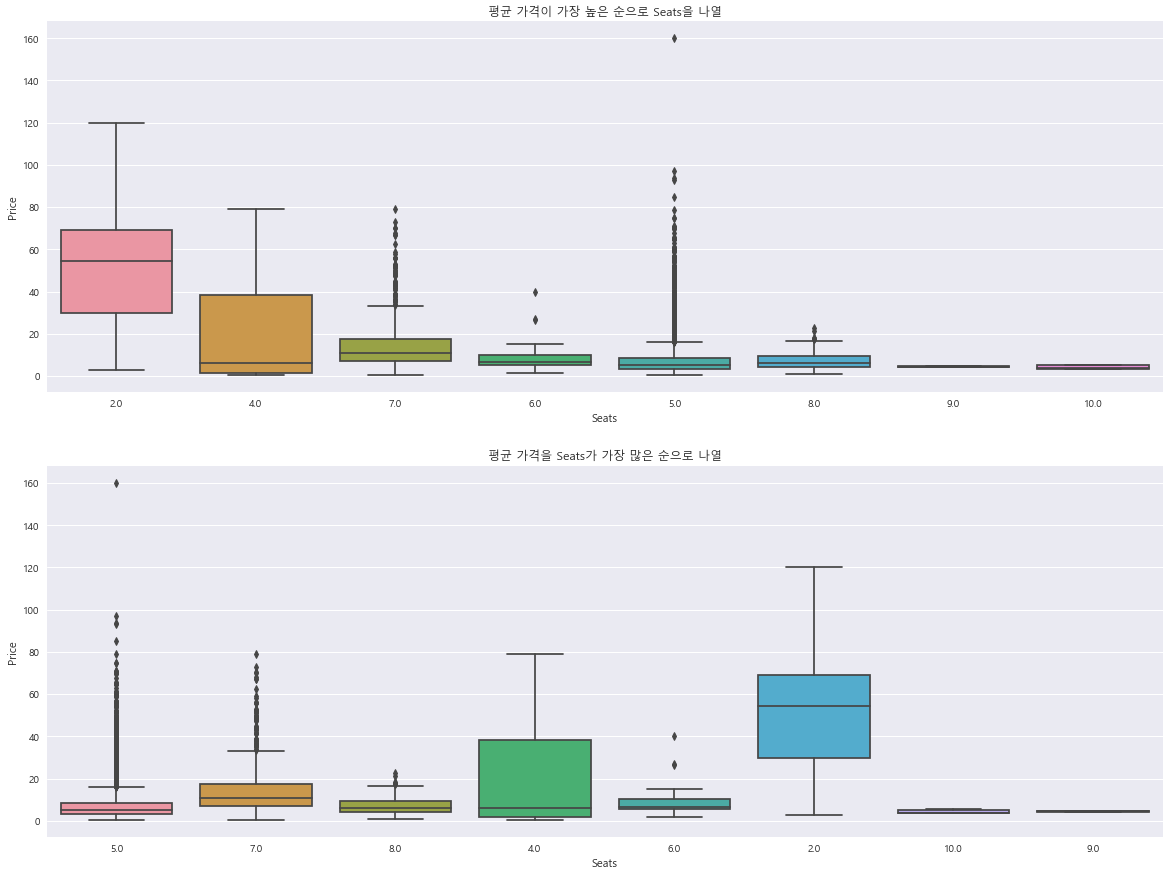

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Seats').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Seats', order = orders, ax = ax[0])
ax[0].set_title('평균 가격이 가장 높은 순으로 Seats을 나열')

orders = data['Seats'].value_counts().index
sns.boxplot(data=data, y='Price', x='Seats', order = orders, ax = ax[1])
ax[1].set_title('평균 가격을 Seats가 가장 많은 순으로 나열')

모델이 같다면 Seats도 같다고 생각하여 이를 기준으로 결측치를 채우려햇지만 같은 모델의 대부분 모두 Seats를 결측치로 가지고 있기 때문에 채울수 없음

하지만 대부분의 자동차가 Seats를 5로 가지고 있고 결측치 중에 존재하는 모델의 자동차도 대부분 5로 설정되어 있기 때문에 5로 채워도 괜찮다고 생각됨

그리고 추후에 Seats 칼럼의 사용여부는 모델 예측 후 정확도에 따라서 판단하는 것이 좋음

## 수치형 변수 확인

In [32]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].describe()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
count,6.019000e+03,6017.000000,5983.000000,5876.000000,824.000000,6019.000000
mean,5.873838e+04,18.134961,1621.276450,113.253050,23.075655,9.479468
std,9.126884e+04,4.582289,601.355233,53.874957,26.182412,11.187917
min,1.710000e+02,0.000000,72.000000,34.200000,3.910000,0.440000
25%,3.400000e+04,15.170000,1198.000000,75.000000,7.977500,3.500000
50%,5.300000e+04,18.150000,1493.000000,97.700000,11.670000,5.640000
75%,7.300000e+04,21.100000,1984.000000,138.100000,26.560000,9.950000
max,6.500000e+06,33.540000,5998.000000,560.000000,230.000000,160.000000


In [33]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven       0
Mileage                 2
Engine                 36
Power                 143
New_Price            5195
Price                   0
dtype: int64

In [34]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

num_cols_df_cor = data[num_cols].corr()

num_cols_df_cor.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
Kilometers_Driven,1.000,-0.065,0.091,0.034,-0.008,-0.011
Mileage,-0.065,1.000,-0.598,-0.538,-0.379,-0.307
Engine,0.091,-0.598,1.000,0.866,0.723,0.658
Power,0.034,-0.538,0.866,1.000,0.871,0.773
New_Price,-0.008,-0.379,0.723,0.871,1.000,0.872
Price,-0.011,-0.307,0.658,0.773,0.872,1.000


수치형 변수들은 모두 상당수의 결측치를 가지고 있으며 Mileage의 경우 최소값이 0이 보이는데 이 또한 결측치로 판단됨

그리고 결측치를 채우기전 수치형 변수간의 상관 관계를 파악했을 때 'Engine', 'Power', 'New_Price'가 Price와 매우 강한 상관관계를 가진다는 것을 확인할 수 있음

따라서 수치형 변수들의 결측치를 앞으로 어떻게 채울것인지가 모델 성능을 높이는데 중요한 역할을 할 것이라고 생각됨

### Kilometers_Driven

Text(0.5, 1.0, 'Kilometers_Driven Log Transformation After')

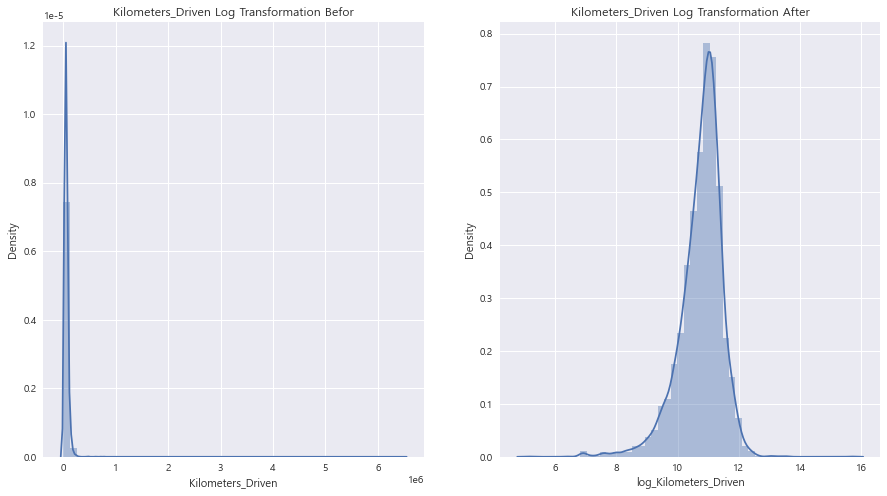

In [35]:
# 로그 변환
data['log_Kilometers_Driven']= data['Kilometers_Driven'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Kilometers_Driven'], ax = ax[0])
sns.distplot(data['log_Kilometers_Driven'], ax = ax[1])
ax[0].set_title('Kilometers_Driven Log Transformation Befor')
ax[1].set_title('Kilometers_Driven Log Transformation After')

Text(0.5, 1.0, 'Kilometers_Driven StandardScaler After')

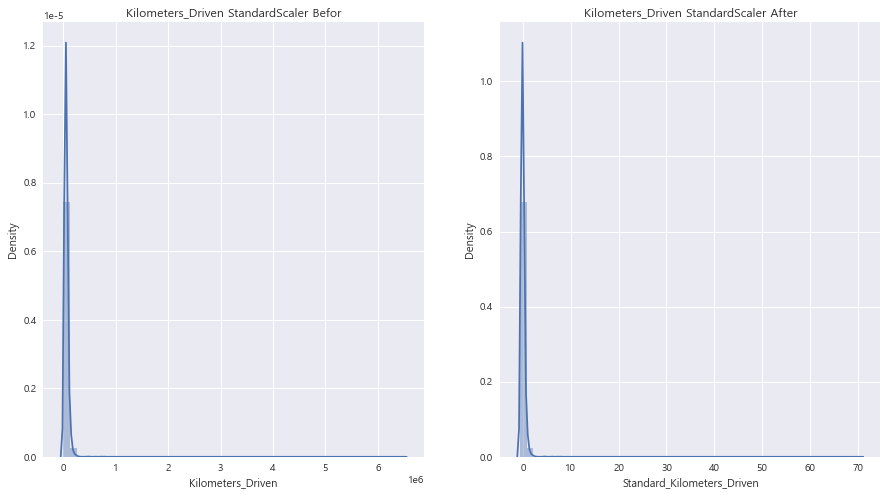

In [36]:
# 표준화
from sklearn.preprocessing import StandardScaler
data['Standard_Kilometers_Driven'] = StandardScaler().fit_transform(data['Kilometers_Driven'].values.reshape(-1,1))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Kilometers_Driven'], ax = ax[0])
sns.distplot(data['Standard_Kilometers_Driven'], ax = ax[1])
ax[0].set_title('Kilometers_Driven StandardScaler Befor')
ax[1].set_title('Kilometers_Driven StandardScaler After')

Text(0.5, 1.0, 'Kilometers_Driven MinMaxScaler After')

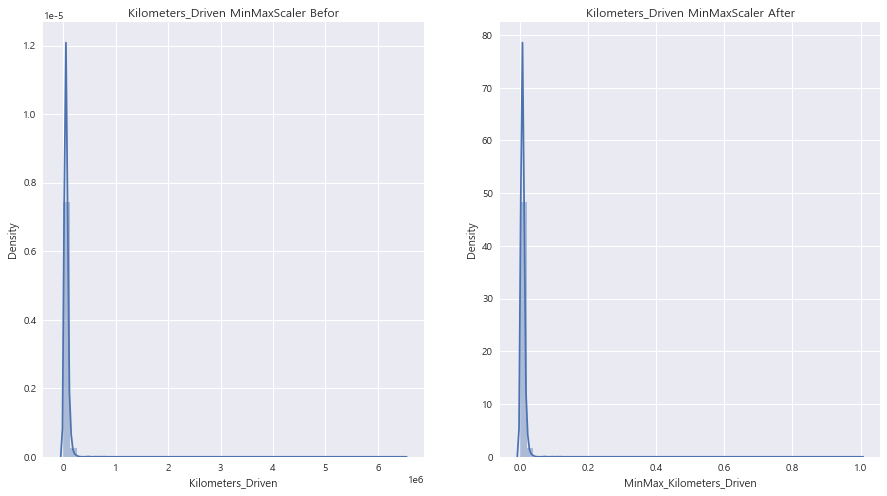

In [37]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
data['MinMax_Kilometers_Driven'] = MinMaxScaler().fit_transform(data['Kilometers_Driven'].values.reshape(-1,1))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Kilometers_Driven'], ax = ax[0])
sns.distplot(data['MinMax_Kilometers_Driven'], ax = ax[1])
ax[0].set_title('Kilometers_Driven MinMaxScaler Befor')
ax[1].set_title('Kilometers_Driven MinMaxScaler After')

Text(0.5, 1.0, 'Kilometers_Driven Log Transformation After')

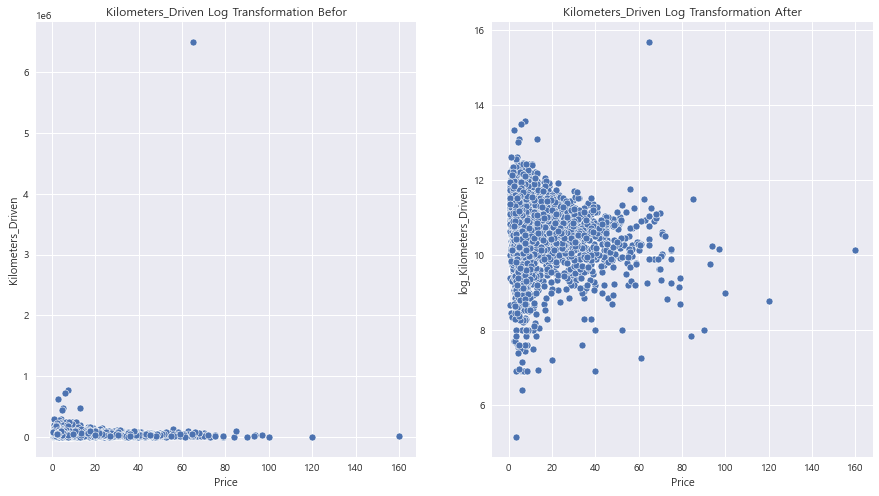

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.scatterplot(x='Price', y='Kilometers_Driven', data= data, ax = ax[0])
sns.scatterplot(x='Price', y='log_Kilometers_Driven', data= data, ax = ax[1])
ax[0].set_title('Kilometers_Driven Log Transformation Befor')
ax[1].set_title('Kilometers_Driven Log Transformation After')

Kilometers_Driven의 경우 Price와 큰 상관성을 가지고 있진 않지만 만약 활용한다면 log변환을 활용하는 것이 바람직해 보임

스케일링 방법에는 정규화, 표준화, 박스콕스 등의 방법이 있지만 

log변환을 활용한 이유에는 정규화, 표준화 등의 방법은 모델의 성능에 향상에 극적인 영향을 주지 않기 때문에

상대적으로 분산을 조금 건드리며 정규분포 형태로 변환해주는 log변환이 더 좋은 방법이라고 생각됨

따라서 앞으로의 수치형 변수의 스케일링에는 log변환만을 사용할 예정임

## 결측치가 존재하는 Mileage, Engine, Power의 결측치 채우기

1. 같은 모델의 값이 존재한다면 그 값으로 채운다.
2. 위의 방법이 해당되지 않는다면 회사의 평균값으로 대체한다.

#### 1번 방법

### Mileage

In [39]:
# Mileage 값이 0인 값을 우선 nan 값으로 대체하여 결측치를 채우는 값의 계산에 영향을 주지않도록 함
# 0인 경우 평균을 구할때 0도 포함되어 값에 영향을 주게됨
data.loc[data['Mileage'] == 0, 'Mileage'] = np.nan

In [40]:
Mileage_model_list = data[data['Mileage'].isnull()]['Model'].unique().tolist()
for model in Mileage_model_list:
    if str(data[data['Model'] == model]['Mileage'].mean()) != 'nan':
        print(model,"은 동일한 값이 존재합니다")
        print('값은', data[data['Model'] == model]['Mileage'].max())

City 1.5 GXI 은 동일한 값이 존재합니다
값은 12.8


In [41]:
data.loc[data['Model'] == 'City 1.5 GXI', 'Mileage'] = 12.8

### Engine

In [42]:
Engine_model_list = data[data['Engine'].isnull()]['Model'].unique().tolist()
for model in Engine_model_list:
    if str(data[data['Model'] == model]['Engine'].mean()) != 'nan':
        print(model,"은 동일한 값이 존재합니다")
        print('값은', data[data['Model'] == model]['Engine'].mean())

City 1.5 GXI 은 동일한 값이 존재합니다
값은 1493.0
Etios Liva V 은 동일한 값이 존재합니다
값은 1197.0
Jazz Select Edition 은 동일한 값이 존재합니다
값은 1198.0


In [43]:
data.loc[data['Model'] == 'City 1.5 GXI', 'Engine'] = 1493.0
data.loc[data['Model'] == 'Etios Liva V', 'Engine'] = 1197.0
data.loc[data['Model'] == 'Jazz Select Edition', 'Engine'] = 1198.0

Engine 경우 같은 Model의 Engine로 결측치를 채우려 했지만 같은 Model이 존재하지 않거나 같은 Model 모두가 결측치인 경우가 많다.

따라서 Engine 칼럼의 경우 사용하지 않을 예정이다.

### Power

In [44]:
Power_model_list = data[data['Power'].isnull()]['Model'].unique().tolist()
for model in Power_model_list:
    if str(data[data['Model'] == model]['Power'].mean()) != 'nan':
        print(model,"은 동일한 값이 존재합니다")
        print('값은', data[data['Model'] == model]['Power'].mean())

City 1.5 GXI 은 동일한 값이 존재합니다
값은 100.0
Swift VDI BSIV 은 동일한 값이 존재합니다
값은 74.0
Etios Liva G 은 동일한 값이 존재합니다
값은 78.9
Etios GD 은 동일한 값이 존재합니다
값은 67.05
Etios Liva GD 은 동일한 값이 존재합니다
값은 67.05000000000001
Bolero ZLX 은 동일한 값이 존재합니다
값은 62.1
Etios Liva V 은 동일한 값이 존재합니다
값은 78.9
Jazz Select Edition 은 동일한 값이 존재합니다
값은 88.8


In [45]:
data.loc[data['Model'] == 'City 1.5 GXI', 'Power'] = 100.0
data.loc[data['Model'] == 'Swift VDI BSIV', 'Power'] = 74.0
data.loc[data['Model'] == 'Etios Liva G', 'Power'] = 78.9
data.loc[data['Model'] == 'Etios GD', 'Power'] = 67.05
data.loc[data['Model'] == 'Etios Liva GD', 'Power'] = 67.05
data.loc[data['Model'] == 'Bolero ZLX', 'Power'] = 62.1
data.loc[data['Model'] == 'Etios Liva V', 'Power'] = 78.9
data.loc[data['Model'] == 'Jazz Select Edition', 'Power'] = 88.8

In [46]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven       0
Mileage                67
Engine                 31
Power                 113
New_Price            5195
Price                   0
dtype: int64

1번 방법 시행후 데이터의 결측치가 어느정도 줄었음을 확인할 수 있다.

#### 2번 방법

In [47]:
Brand_list = data.groupby('Brand').mean().index.tolist()
Mileage_list = data.groupby('Brand').mean()['Mileage'].values.tolist()
Engine_list = data.groupby('Brand').mean()['Engine'].values.tolist()
Power_list = data.groupby('Brand').mean()['Power'].values.tolist()

def get_Mileage(x):
    if str(x['Mileage']) != 'nan': return x['Mileage']
    brand_idx = Brand_list.index(x['Brand'])
    Mileage_val = Mileage_list[brand_idx]
    return Mileage_val

data['Mileage'] = data.apply(lambda x : get_Mileage(x), axis=1)

def get_Engine(x):
    if str(x['Engine']) != 'nan': return x['Engine']
    brand_idx = Brand_list.index(x['Brand'])
    Engine_val = Engine_list[brand_idx]
    return Engine_val

data['Engine'] = data.apply(lambda x : get_Engine(x), axis=1)

def get_Power(x):
    if str(x['Power']) != 'nan': return x['Power']
    brand_idx = Brand_list.index(x['Brand'])
    Power_val = Power_list[brand_idx]
    return Power_val

data['Power'] = data.apply(lambda x : get_Power(x), axis=1)

In [48]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven       0
Mileage                 1
Engine                  0
Power                   1
New_Price            5195
Price                   0
dtype: int64

2번 방법 시행후 데이터의 결측치가 상당 부분 많이 줄었음을 확인할 수 있다.

In [49]:
data[data['Power'].isnull()]['Mileage']

915   NaN
Name: Mileage, dtype: float64

그럼에도 데이터의 결측치가 존재한다는 것을 확인할 수 있는데 Mileage와 Power모두 결측치로 가지고 있다.

이 결측치는 동일한 Engine을 가진 차량의 Mileage와 Power 의 평균 값으로 대체하겠다.

In [50]:
data.loc[data['Power'].isnull(), 'Power'] = data[data['Engine'] == 799].mean()['Power']
data.loc[data['Mileage'].isnull(), 'Mileage'] = data[data['Engine'] == 799].mean()['Mileage']

In [51]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
New_Price            5195
Price                   0
dtype: int64

결측치가 완전히 사라졌음을 확인할 수 있다.

### New_Price

In [52]:
New_Price_model_list = data[data['New_Price'].isnull()]['Model'].unique().tolist()
pml = []
pmv = []
for model in New_Price_model_list:
    if str(data[data['Model'] == model]['New_Price'].mean()) != 'nan':
        print(model,"은 동일한 값이 존재합니다")
        val = data[data['Model'] == model]['New_Price'].mean()
        print('값은', val)
        pml.append(model)
        pmv.append(val)

def get_New_Price_Model(x):
    if str(x['New_Price']) != 'nan': return x['New_Price']
    elif x['Model'] not in pml: return x['New_Price']
    else:
        Model_idx = pml.index(x['Model'])
        New_Price_val = pmv[Model_idx]
        return New_Price_val

data['New_Price'] = data.apply(lambda x : get_New_Price_Model(x), axis=1)

Ertiga VDI 은 동일한 값이 존재합니다
값은 11.12875
Swift LDI 은 동일한 값이 존재합니다
값은 7.136666666666666
Swift VDI 은 동일한 값이 존재합니다
값은 8.055714285714286
Wagon R LXI 은 동일한 값이 존재합니다
값은 4.852499999999999
Alto K10 LXI 은 동일한 값이 존재합니다
값은 4.036666666666666
Wagon R VXI 은 동일한 값이 존재합니다
값은 5.428181818181818
Duster 110PS Diesel RxZ 은 동일한 값이 존재합니다
값은 15.01
Swift VXI 은 동일한 값이 존재합니다
값은 6.995
Polo 1.5 TDI Highline 은 동일한 값이 존재합니다
값은 10.064285714285715
3 Series 320d Luxury Line 은 동일한 값이 존재합니다
값은 53.798571428571435
3 Series 320d 은 동일한 값이 존재합니다
값은 46.965384615384615
Ertiga ZDI 은 동일한 값이 존재합니다
값은 12.276666666666666
Polo GT TSI 은 동일한 값이 존재합니다
값은 11.254
Vento 1.5 TDI Comfortline 은 동일한 값이 존재합니다
값은 11.65
CLA 200 CDI Sport 은 동일한 값이 존재합니다
값은 43.475
A Class A180 Sport 은 동일한 값이 존재합니다
값은 34.63
Bolero ZLX 은 동일한 값이 존재합니다
값은 11.17
Micra XV CVT 은 동일한 값이 존재합니다
값은 9.305
Polo 1.5 TDI Comfortline 은 동일한 값이 존재합니다
값은 9.56
Vento 1.5 TDI Highline 은 동일한 값이 존재합니다
값은 14.24
Vento 1.5 TDI Highline AT 은 동일한 값이 존재합니다
값은 15.788
Vento 1.6 Highline 은 동일한 값이 존재합

In [53]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
New_Price            5007
Price                   0
dtype: int64

In [54]:
Brand_list = data.groupby('Brand').mean().index.tolist()
New_Price_list = data.groupby('Brand').mean()['New_Price'].values.tolist()

def get_New_Price(x):
    if str(x['New_Price']) != 'nan': return x['New_Price']
    brand_idx = Brand_list.index(x['Brand'])
    New_Price_val = New_Price_list[brand_idx]
    return New_Price_val

data['New_Price'] = data.apply(lambda x : get_New_Price(x), axis=1)

In [55]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven      0
Mileage                0
Engine                 0
Power                  0
New_Price            130
Price                  0
dtype: int64

In [56]:
data.loc[data['New_Price'].isnull(), 'New_Price'] = data.mean()['New_Price']

In [57]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].isnull().sum()

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
New_Price            0
Price                0
dtype: int64

New_Price의 경우에도 앞의 칼럼과 동일한 방식으로 결측치를 채워주었고 모든 결측치가 사라졌다는 것을 확인할 수 있다.

### 분포 확인

In [58]:
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

data[num_cols].describe()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,18.325637,1620.636524,112.887672,21.892595,9.479468
std,9.126884e+04,4.165283,600.745077,53.696482,22.864500,11.187917
min,1.710000e+02,6.400000,72.000000,34.200000,3.910000,0.440000
25%,3.400000e+04,15.290000,1198.000000,75.000000,10.340000,3.500000
50%,5.300000e+04,18.200000,1493.000000,93.700000,11.628673,5.640000
75%,7.300000e+04,21.100000,1984.000000,138.100000,23.872073,9.950000
max,6.500000e+06,33.540000,5998.000000,560.000000,230.000000,160.000000


### Mileage

Text(0.5, 1.0, 'Mileage Log Transformation After')

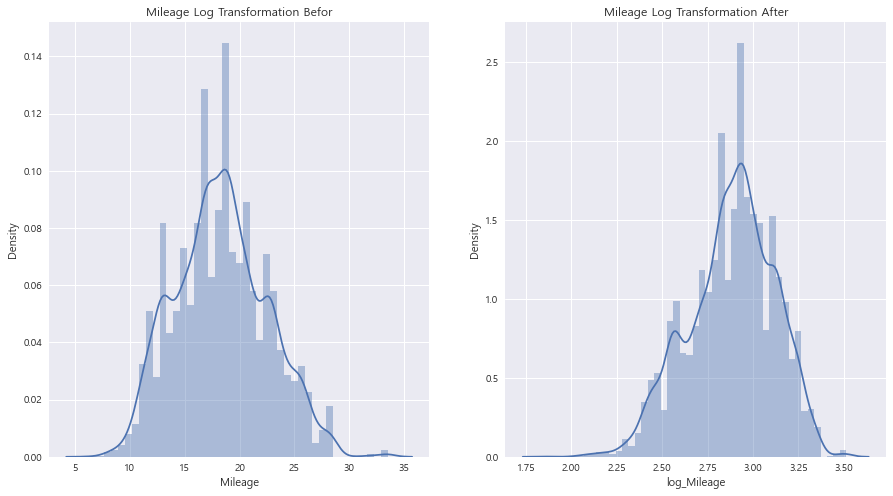

In [59]:
# 로그 변환
data['log_Mileage']= data['Mileage'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Mileage'], ax = ax[0])
sns.distplot(data['log_Mileage'], ax = ax[1])
ax[0].set_title('Mileage Log Transformation Befor')
ax[1].set_title('Mileage Log Transformation After')

### Engine

Text(0.5, 1.0, 'Engine Log Transformation After')

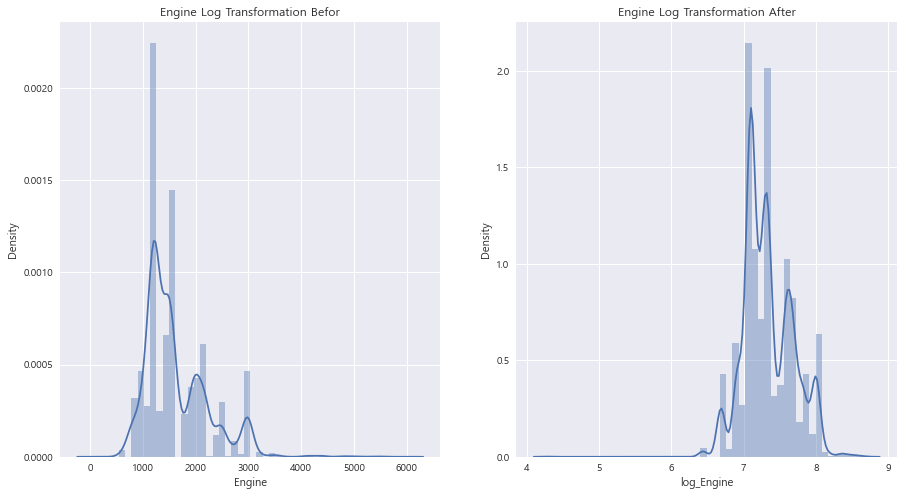

In [60]:
# 로그 변환
data['log_Engine']= data['Engine'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Engine'], ax = ax[0])
sns.distplot(data['log_Engine'], ax = ax[1])
ax[0].set_title('Engine Log Transformation Befor')
ax[1].set_title('Engine Log Transformation After')

### Power

Text(0.5, 1.0, 'Power Log Transformation After')

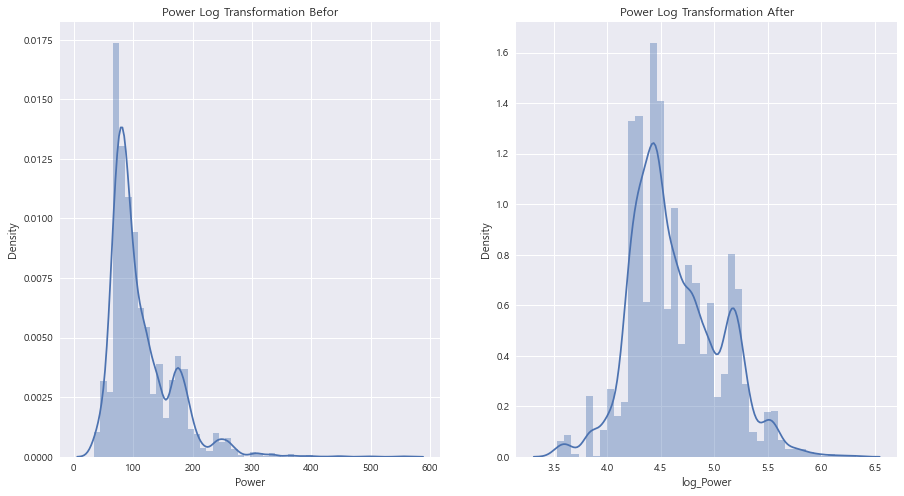

In [61]:
# 로그 변환
data['log_Power']= data['Power'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Power'], ax = ax[0])
sns.distplot(data['log_Power'], ax = ax[1])
ax[0].set_title('Power Log Transformation Befor')
ax[1].set_title('Power Log Transformation After')

### New_Price

Text(0.5, 1.0, 'New_Price Log Transformation After')

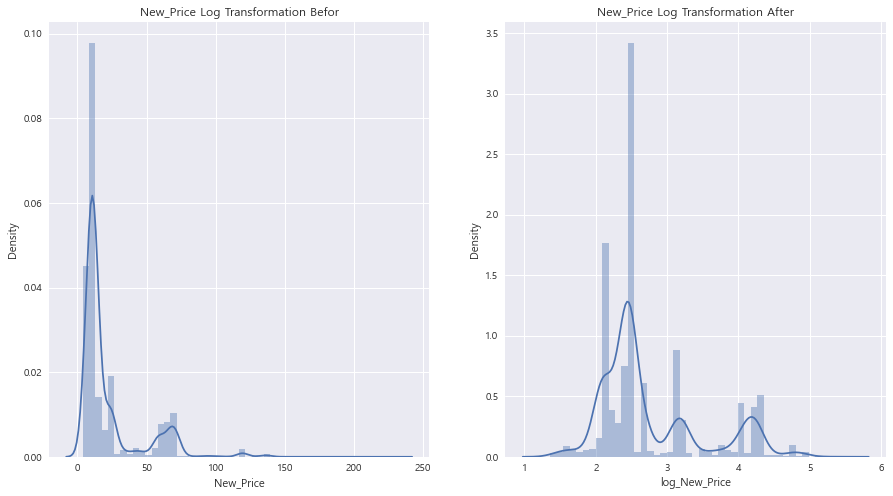

In [62]:
# 로그 변환
data['log_New_Price']= data['New_Price'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['New_Price'], ax = ax[0])
sns.distplot(data['log_New_Price'], ax = ax[1])
ax[0].set_title('New_Price Log Transformation Befor')
ax[1].set_title('New_Price Log Transformation After')

## Target 변수 확인

Text(0.5, 1.0, 'Price Log Transformation After')

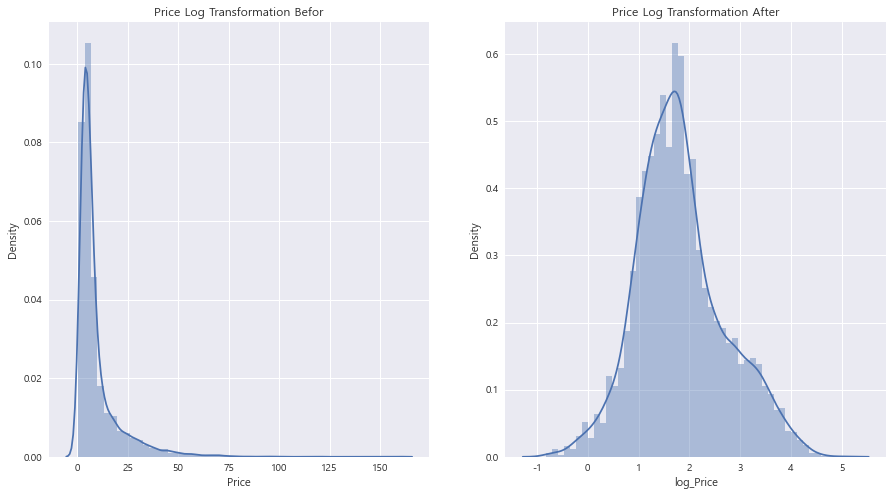

In [63]:
# 로그 변환
data['log_Price']= data['Price'].map(lambda x : np.log(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Price'], ax = ax[0])
sns.distplot(data['log_Price'], ax = ax[1])
ax[0].set_title('Price Log Transformation Befor')
ax[1].set_title('Price Log Transformation After')

로그 변환을 통해서 정규 분포와 유사해졌음을 확인할 수 있다

추후에 모델에 예측을 한후 exp를 통해서 원래 스케일로 되돌려주는 과정이 필요하다 

## 상관관계 확인

In [64]:
num_cols = ['Kilometers_Driven', 'log_Kilometers_Driven', 'Mileage', 'log_Mileage', 'Engine', 'log_Engine', 'Power', 'log_Power', 'New_Price', 'log_New_Price', 'Price', 'log_Price']

num_cols_df_cor = data[num_cols].corr()

num_cols_df_cor.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Kilometers_Driven,log_Kilometers_Driven,Mileage,log_Mileage,Engine,log_Engine,Power,log_Power,New_Price,log_New_Price,Price,log_Price
Kilometers_Driven,1.000,0.418,-0.064,-0.067,0.091,0.095,0.032,0.037,0.008,0.030,-0.011,-0.048
log_Kilometers_Driven,0.418,1.000,-0.130,-0.139,0.149,0.173,0.011,0.043,-0.007,0.038,-0.186,-0.204
Mileage,-0.064,-0.130,1.000,0.989,-0.643,-0.637,-0.549,-0.571,-0.405,-0.472,-0.336,-0.305
log_Mileage,-0.067,-0.139,0.989,1.000,-0.688,-0.671,-0.582,-0.593,-0.423,-0.485,-0.358,-0.329
Engine,0.091,0.149,-0.643,-0.688,1.000,0.971,0.865,0.854,0.630,0.693,0.659,0.687
log_Engine,0.095,0.173,-0.637,-0.671,0.971,1.000,0.837,0.882,0.613,0.696,0.620,0.695
Power,0.032,0.011,-0.549,-0.582,0.865,0.837,1.000,0.957,0.753,0.774,0.773,0.763
log_Power,0.037,0.043,-0.571,-0.593,0.854,0.882,0.957,1.000,0.707,0.762,0.712,0.783
New_Price,0.008,-0.007,-0.405,-0.423,0.630,0.613,0.753,0.707,1.000,0.939,0.756,0.689
log_New_Price,0.030,0.038,-0.472,-0.485,0.693,0.696,0.774,0.762,0.939,1.000,0.718,0.708


결측치를 채우기 전 보다 상관게수 값이 하락했다는 것을 확인할 수 있지만

전체 모델의 데이터를 다 활용하기 위해서는 결측치를 채워주는 과정은 무조건 필요하기 때문에

결측치를 채운 데이터를 활용할 예정이고

확실히 log 변환 후에 상관계수가 증가했다는 것을 확인할 수 있으며 모델에는 로그변환이 된 수치형변수를 반영할 예정이다.

# Model

## 모델 반영전 범주형 변수의 인코딩

선형 모델의 경우 label 인코딩 보다 one_hot 인코딩이 더 변수의 특성을 잘 반영하기 때문에 범주형 변수의 경우 one_hot 인코딩을 시행할 예정이다. 

In [65]:
cat_cols = ['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
cat_data = data[cat_cols]
cat_data['Year'] = cat_data.Year.astype('str')
cat_data['Seats'] = cat_data.Seats.astype('int').astype('str')
# 원핫인코딩을 시행
cat_data = pd.get_dummies(cat_data, prefix=cat_cols)

num_cols = ['log_Kilometers_Driven', 'log_Mileage', 'log_Engine', 'log_Power', 'log_New_Price', 'log_Price']
num_data = data[num_cols]

# 범주형 데이터와 수치형 데이터를 합침
train = pd.concat([cat_data, num_data], axis=1)

# log_Price를 제외한 모든 데이터를 feature로 설정
feature = train.iloc[:, :-1]
# log_Price를 target로 설정
target = train.iloc[:, -1]

In [66]:
print('원래 데이터의 크기: ', train.shape)
print('feature의 크기    : ', feature.shape)
print('target의 크기     : ', target.shape)

원래 데이터의 크기:  (6019, 89)
feature의 크기    :  (6019, 88)
target의 크기     :  (6019,)


In [67]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

모델의 일반화 여부를 판단하기 위해서 train 데이터와 test 데이터를 8:2로 분리하였다.

앞으로 모델 성능의 평가의 기준은 test 데이터로 이루어질 것이다.

## statsmodel OLS

In [68]:
import statsmodels.api as sm

model = sm.OLS(target, feature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1170.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:37:12   Log-Likelihood:                 790.12
No. Observations:                6019   AIC:                            -1416.
Df Residuals:                    5937   BIC:                            -866.6
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Brand_Ambassador              0.2127      0.216      0.987      0.324      -0.210       0.635
Brand_Audi                    0.0355      0.032      1.120      0.263      -0.027       0.098
Brand_BMW                     0.0497      0.030      1.632      0.103      -0.010       0.109
Brand_Bentley                 0.9295      0.212      4.383      0.000       0.514       1.345
Brand_Chevrolet              -0.6387      0.027    -23.850      0.000      -0.691      -0.586
Brand_Datsun                 -0.3324      0.067     -4.929      0.000      -0.465      -0.200
Brand_Fiat                   -0.3799      0.046     -8.286      0.000      -0.470      -0.290
Brand_Force                  -0.3237      0.122     -2.658      0.008      -0.562      -0.085
Brand_Ford                   -0.2896      0.023    -12.391      0.000      -0.335      -0.244
Brand_Honda                  -0.2008      0.024     -8.401      0.000      -0.248      -0.154
Brand_Hyundai                -0.1922      0.023     -8.462      0.000      -0.237      -0.148
Brand_ISUZU                  -0.6330      0.148     -4.272      0.000      -0.923      -0.342
Brand_Isuzu                  -0.4599      0.209     -2.204      0.028      -0.869      -0.051
Brand_Jaguar                  0.1531      0.043      3.576      0.000       0.069       0.237
Brand_Jeep                   -0.1348      0.057     -2.353      0.019      -0.247      -0.022
Brand_Lamborghini             1.0958      0.217      5.060      0.000       0.671       1.520
Brand_Land                    0.2440      0.046      5.268      0.000       0.153       0.335
Brand_Mahindra               -0.3514      0.027    -12.787      0.000      -0.405      -0.297
Brand_Maruti                 -0.0534      0.027     -1.988      0.047      -0.106      -0.001
Brand_Mercedes-Benz           0.0637      0.032      1.990      0.047       0.001       0.126
Brand_Mini                    0.4265      0.049      8.793      0.000       0.331       0.522
Brand_Mitsubishi             -0.1979      0.050     -3.959      0.000      -0.296      -0.100
Brand_Nissan                 -0.2011      0.031     -6.402      0.000      -0.263      -0.140
Brand_Porsche                -0.0380      0.065     -0.588      0.556      -0.165       0.089
Brand_Renault                -0.1692      0.029     -5.859      0.000      -0.226      -0.113
Brand_Skoda                  -0.3107      0.025    -12.293      0.000      -0.360      -0.261
Brand_Smart                   0.1899      0.217      0.876      0.381      -0.235       0.615
Brand_Tata                   -0.5443      0.029    -18.810      0.000      -0.601      -0.488
Brand_Toyota                 -0.1333      0.023     -5.785      0.000      -0.179      -0.088
Brand_Volkswagen             -0.2098      0.024     -8.576      0.000      

OLS Model을 통해서 전체 변수를 사용해도 되는지 전체 데이터를 가지고 판단한 결과

- R-squared: 0.941
- Adj. R-squared: 0.940

결정계수 값은 0.94로 모델의 설명력은 높다고 볼 수 있다. 즉 데이터를 잘 예측한다고 볼 수 있다. 

- F-statistic: 1170
- Prob (F-statistic): 0.00

모형의 유의미함을 판단하는 F-통계량의 경우 1170이 나오며 통계적으로도 유의미한 모형임을 알 수 있다.

- 변수들을 사용해도 되는지 여부를 판단하는 P>|t|  

변수들을 사용해도 되는지 여부를 판단하는 P>|t| 를 보았을때 몇몇의 원핫인코딩된 범주형 변수의 경우 0.05를 넘는 값이 존재하지만 수치형 변수 중에는 모두 통계적으로 유의미하다는 것을 확인할 수 있다.
원핫인코딩된 범주형 변수의 경우 상관계수 값을 잘 측정할 수 없으므로 P>|t| 값은 의미없다고 생각하여 모든 변수를 활용해도 된다는 것을 알 수 있다.

- Durbin-Watson: 1.964

오차항의 독립성을 만족하는지를 판단하는 Durbin-Watson 통계량의 경우 2에 가까울수록 독립성을 만족하기 때문에 현재 모델의 값은 2에 가까움으로 오차항이 독립성을 만족한다고 볼 수 있다.

또한 수치형 변수들간의 다중공선성이 의심되는 변수가 존재하였지만 추후에 나올 VIF 검정 결과 다중공선성을 발생시킬만한 변수는 존재하지 않는다는 것을 알 수 있다

따라서 전체 변수를 가지고 선형회귀를 돌려도 좋다는 것을 OLS 모델을 통해서 확인할 수 있다.

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [70]:
intercept = lr.intercept_
coef = lr.coef_
print(f'절편은 {intercept}, \n 기울기는 \n {coef}')

절편은 462872738669.1071, 
 기울기는 
 [-4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11
 -4.62872739e+11 -4.62872739e+11 -4.62872739e+11 -7.30895996e-03
  1.60865784e-01  4.55703735e-02  1.13964081e-01 -8.54949951e-02
  1.31286621e-01 -3.47442627e-02 -1.24206543e-02 -2.30285645e-01
 -7.36999512e-02 -4.51812744e-02 -9.92065430e-01 -8.27216625e-01
 -5.53436279e-01 -8.91044617e-01 -6.60476685e-01 -6.35864258e-01
 -5.88516235e-01 -6.29852295e-01 -3.32077026e-01 -1.72851562e-01
 -1.23931885e-01 -1.73645020e-02  1.00265503e-01  2.44232178e-01
  3.83224487e-01  4.96673584e-01  6.23657227e-01  7.402801

Text(0.5, 1.0, 'Linear Regression feature importace')

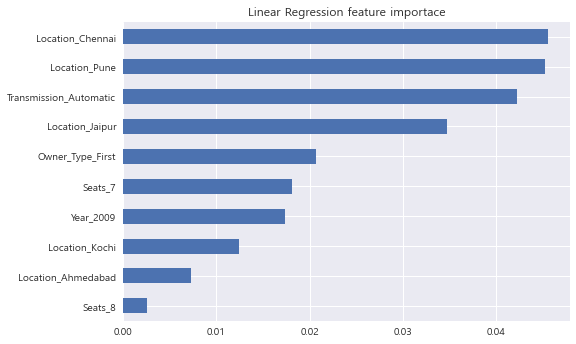

In [71]:
# 상위 10개의 중요 픽쳐
features = abs(pd.Series(index = X_train.columns, data = lr.coef_)).sort_values(ascending=True)
features[:10].plot.barh()
plt.title('Linear Regression feature importace')

In [72]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Linear Regression train R-squared: ',lr.score(X_train, y_train))
print('Linear Regression test R-squared : ',lr.score(X_test, y_test))
# MSE
print('Linear Regression train MSE      : ',mean_squared_error(y_train, lr_pred_train))
print('Linear Regression test MSE       : ',mean_squared_error(y_test, lr_pred_test))

Linear Regression train R-squared:  0.944041298661168
Linear Regression test R-squared :  0.9261517853649139
Linear Regression train MSE      :  0.042830145411117654
Linear Regression test MSE       :  0.05593334845849665


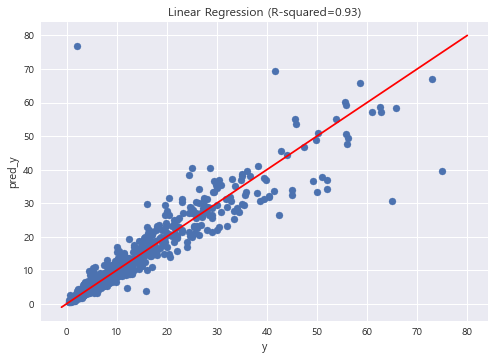

In [73]:
plt.scatter(np.exp(y_test), np.exp(lr_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Linear Regression (R-squared=0.93)')
plt.show()

LinearRegression: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델이다.

LinearRegression은 예측 값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 모델이다. OLS 기반의 회귀 계수 계산은 입력 피쳐의 독립성에 많은 영향을 받는다. 따라서 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중공선성 문제라고 하며 일반적으로 상관관계가 높은 피쳐가 많은 경우 독립적인 중요한 피쳐만 남기고 제거하거나 규제를 적용한다. 또한 매우 많은 피쳐가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려할 수 있다.

## Ridge

In [74]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10) # 10만큼의 규제적용 클수록 규제를 가하는 정도가 강해짐
ridge.fit(X_train, y_train)
ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)

In [75]:
intercept = ridge.intercept_
coef = ridge.coef_
print(f'절편은 {intercept}, \n 기울기는 \n {coef}')

절편은 -3.3250278373442663, 
 기울기는 
 [ 0.01143124  0.05020962  0.05064124  0.09065702 -0.44641773 -0.03029941
 -0.11061694 -0.03948477 -0.09518311 -0.00743745  0.01104675 -0.05809655
 -0.03074317  0.13212016  0.0027857   0.11181003  0.19688212 -0.09764258
  0.17244967  0.07268471  0.33623724 -0.08437112  0.00696142  0.07718976
  0.05395211 -0.17790029  0.02666727 -0.26674535  0.0473697   0.0011186
 -0.0072759  -0.00694645  0.15887499  0.0339941   0.14228171 -0.07413593
  0.12855208 -0.04019631  0.02155214 -0.24079484 -0.07675237 -0.04642911
 -0.25417971 -0.15714858 -0.19449437 -0.38908997 -0.39614124 -0.4320166
 -0.49804563 -0.64213355 -0.38516177 -0.28600868 -0.25577971 -0.16550563
 -0.06542579  0.06724044  0.18949143  0.29107544  0.40939138  0.51874037
  0.59756648  0.68305468  0.72123227  0.64333877 -0.06162392  0.03174888
  0.24120089 -0.04717167 -0.16415418  0.06299975 -0.06299975  0.08612203
  0.01590226 -0.00866043 -0.09336386 -0.00745788  0.11208743 -0.05654177
 -0.1135346  -0.022

Text(0.5, 1.0, 'Ridge feature importace')

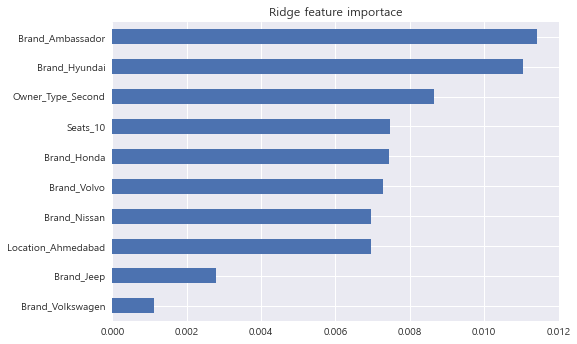

In [76]:
# 상위 10개의 중요 픽쳐
features = abs(pd.Series(index = X_train.columns, data = ridge.coef_)).sort_values(ascending=True)
features[:10].plot.barh()
plt.title('Ridge feature importace')

In [77]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Ridge train R-squared: ',ridge.score(X_train, y_train))
print('Ridge test R-squared : ',ridge.score(X_test, y_test))
# MSE
print('Ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('Ridge test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

Ridge train R-squared:  0.9371599592203739
Ridge test R-squared :  0.9234443670291538
Ridge train MSE      :  0.04809704335229536
Ridge test MSE       :  0.05798397316141328


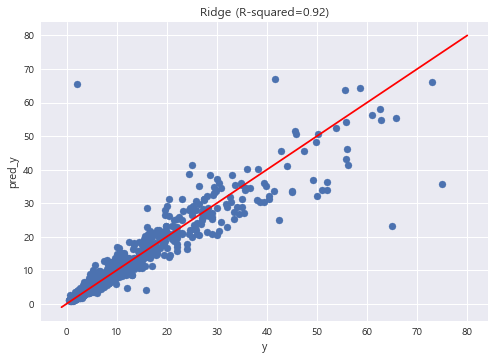

In [78]:
plt.scatter(np.exp(y_test), np.exp(ridge_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Ridge (R-squared=0.92)')
plt.show()

Ridge: Ridge는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2 규제를 적용하는데 L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.

alpha 값이 커질수록 따라 회귀 계수의 값이 작아지지만 회귀 계수의 값을 0으로 만들지는 않는다 즉 모든 피쳐를 어떻게든 다 활용하는 모델이다.

## Lasso

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)# 10만큼의 규제적용 클수록 규제를 가하는 정도가 강해짐
lasso.fit(X_train, y_train)
lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)

In [80]:
intercept = lasso.intercept_
coef = lasso.coef_
print(f'절편은 {intercept}, \n 기울기는 \n {coef}')

절편은 -3.8639121724770256, 
 기울기는 
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -4.60868322e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.72257240e-02 -8.70845251e-03  3.96188554e-04 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  6.38327218e-02 -4.24103662e-02  1.76642340e-01  0.00000000e+00
  1.83655988e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.85096907e-02 -1.84106977e-01  0.00000000e+00 -2.45634134e-01
  4.00145860e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.56486441e-01  2.59503858e-02  1.33242802e-01 -5.42567647e-02
  1.34813281e-01 -1.92082258e-02  9.14341393e-03 -2.23113173e-01
 -6.19222877e-02 -3.15011106e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.13913101e-01 -1.64688919e-01 -2.41204006e-01
 -3.50475249e-01 -5.11272485e-01 -2.11298404e-01 -1.06689589e-01
 -8.05162145e-02 -0.00000000e+00  6.88957282e-02  2.15161408e-01
  3.45749763e-01  4.48431012e-01  5.71324810e-01  6.8536

Text(0.5, 1.0, 'Lasso feature importace')

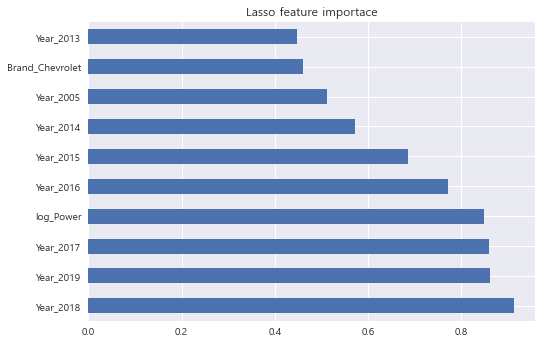

In [81]:
# 상위 10개의 중요 픽쳐
features = abs(pd.Series(index = X_train.columns, data = lasso.coef_)).sort_values(ascending=False)
features.sort_values(ascending=False)[:10].plot.barh()
plt.title('Lasso feature importace')

In [82]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Lasso train R-squared: ',lasso.score(X_train, y_train))
print('Lasso test R-squared : ',lasso.score(X_test, y_test))
# MSE
print('Lasso train MSE      : ',mean_squared_error(y_train, lasso_pred_train))
print('Lasso test MSE       : ',mean_squared_error(y_test, lasso_pred_test))

Lasso train R-squared:  0.9345659768883048
Lasso test R-squared :  0.9205628364548786
Lasso train MSE      :  0.050082447548930924
Lasso test MSE       :  0.06016647214938711


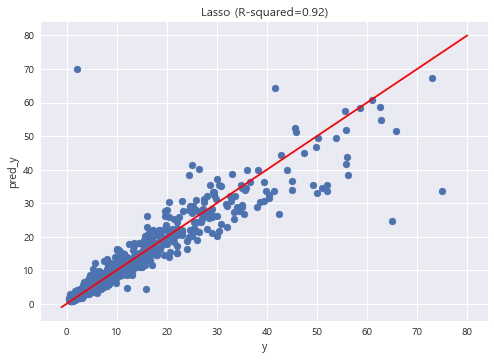

In [83]:
plt.scatter(np.exp(y_test), np.exp(lasso_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Lasso (R-squared=0.92)')
plt.show()

Lasso: Lasso는 선형 회귀에 L1 규제를 적용한 방식이다. L2규제가 회귀 계수 값의 크기를 줄이는데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.

alpha 값이 커질수록 따라 회귀 계수의 값이 작아지며 회귀 계수의 값을 0으로 만들수도 있다. 즉 모든 피쳐를 다 활용하지 않고 필요 없는 피쳐는 사용하지 않는 모델이다. 따라서 피쳐 선택의 효과를 얻을 수 있다.

## ElasticNet

In [84]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticNet.fit(X_train, y_train)
elasticNet_pred_train = elasticNet.predict(X_train)
elasticNet_pred_test = elasticNet.predict(X_test)

In [85]:
intercept = elasticNet.intercept_
coef = elasticNet.coef_
print(f'절편은 {intercept}, \n 기울기는 \n {coef}')

절편은 -1.7368958630516096, 
 기울기는 
 [-0.          0.         -0.          0.         -0.22783181 -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.13078115  0.          0.         -0.          0.          0.
  0.         -0.05088677  0.         -0.08788491  0.03436484  0.
 -0.          0.          0.08802872  0.          0.18312103 -0.
  0.08266418 -0.          0.07211405 -0.20167971 -0.03626685 -0.00204763
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.23412321 -0.07989288 -0.11329482 -0.13903398 -0.1028897
 -0.07956096 -0.          0.00648758  0.09285815  0.20031077  0.29947648
  0.34970491  0.38478898  0.33447018  0.0826838   0.          0.10231311
  0.         -0.         -0.18004384  0.08229029 -0.07904384  0.16778816
 -0.         -0.         -0.         -0.          0.         -0.
 -0.07092575 -0.          0.07065808  0.          0.         -0.21570262
  0.     

Text(0.5, 1.0, 'ElasticNet feature importace')

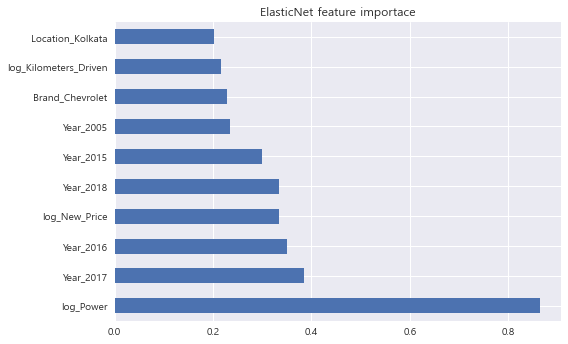

In [86]:
# 상위 10개의 중요 픽쳐
features = abs(pd.Series(index = X_train.columns, data = elasticNet.coef_)).sort_values(ascending=False)
features[:10].plot.barh()
plt.title('ElasticNet feature importace')

In [87]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('ElasticNet train R-squared: ',elasticNet.score(X_train, y_train))
print('ElasticNet test R-squared : ',elasticNet.score(X_test, y_test))
# MSE
print('ElasticNet train MSE      : ',mean_squared_error(y_train, elasticNet_pred_train))
print('ElasticNet test MSE       : ',mean_squared_error(y_test, elasticNet_pred_test))

ElasticNet train R-squared:  0.8894562853318838
ElasticNet test R-squared :  0.8788459045589796
ElasticNet train MSE      :  0.0846088858433709
ElasticNet test MSE       :  0.09176327783904133


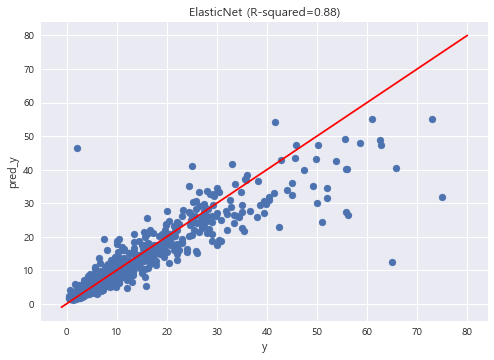

In [88]:
plt.scatter(np.exp(y_test), np.exp(elasticNet_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('ElasticNet (R-squared=0.88)')
plt.show()

ElasticNet: L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정할 수 있다.

alpha 값이 커질수록 규제의 강도가 강해진다.

ElasticNet의 규제는 a * L1 + b * L2로 정의할 수 있다.

l1_ratio = a / (a + b) 이다. 

따라서 l1_ratio가 0 이면 a가 0이므로 L2규제와 동일하고  l1_ratio가 1 이면 b가 0이므로 L1규제와 동일하다.

## 모델 평가

test 데이터를 기준으로 모델의 성능을 비교하였을 때

|**모델의 종류**      |**R-squared**|**MSE**|
|:---------------------:|:---:|:---:|
|**Linear Regression**|0.9261|0.0559|
|**Ridge**            |0.9234|0.0579|
|**Lasso**            |0.9205|0.0601|
|**ElasticNet**       |0.8788|0.0917|

Linear Regression, Ridge, Lasso, ElasticNet 순으로 모델의 성능이 좋다는 것을 확인할 수 있다.

그런데 개인적인 생각으로는 규제가 적용되는 Ridge, Lasso, ElasticNet의 모델이 하이퍼 파라미터 튜닝을 통해서 일반화가 더 잘 될 수 있다고 생각된다.

현재 Linear Regression의 경우 과적합의 가능성이 존재한다고 생각되며 추후에 하이퍼 파라미터 튜닝을 통해서 규제가 적용되는 모델들 중에 하나를 최종 모델로 선택하는 것이 더 좋다고 생각된다.

개인적인 생각으로 원핫 인코딩된 범주형 변수에 의해서 featrue의 개수가 상대적으로 많이 증가하였기 때문에 하이퍼 파라미터 튜닝을 통해서 L1 규제와 L2규제를 같이 적용하는 ElasticNet을 활용하는 것이 더 좋다고 생각된다.

하지만 앞으로의 회귀분석 가정 검토의 경우 가장 성능이 좋았던 Linear Regression 모델을 기준으로 판단할 예정이다.

# 회귀분석 가정 검토

## 설명변수와 종속변수 간 선형성

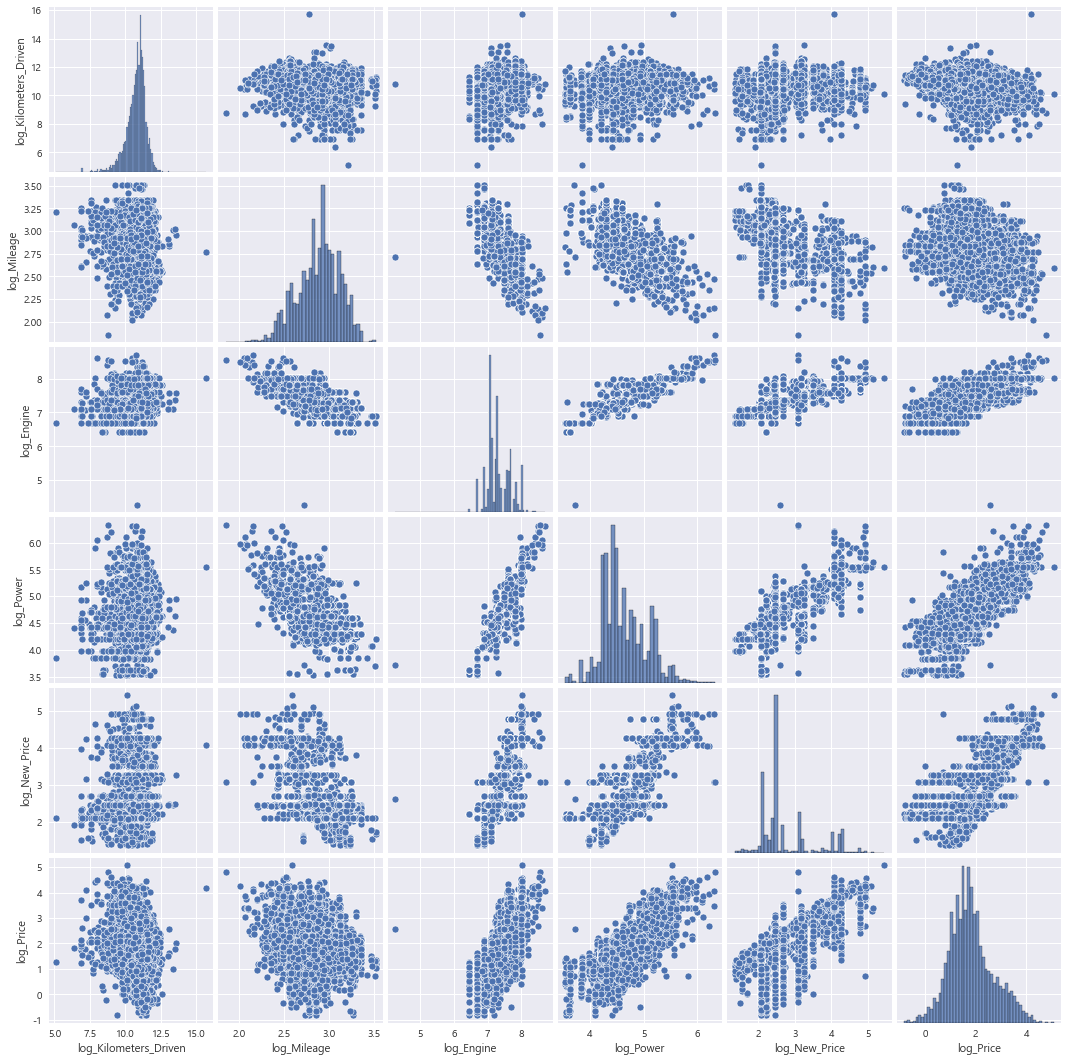

In [89]:
sns.pairplot(num_data)

범주형 변수의 경우 연속형 변수인 log_Price와의 상관관계를 파악하는 것은 의미없다고 생각되어 연속형 변수들만을 가지고 설명변수와 종속변수 간 선형성을 판단한 결과 서로 선형성이 존재한다는 것을 확인할 수 있다.

## 잔차의 정규성

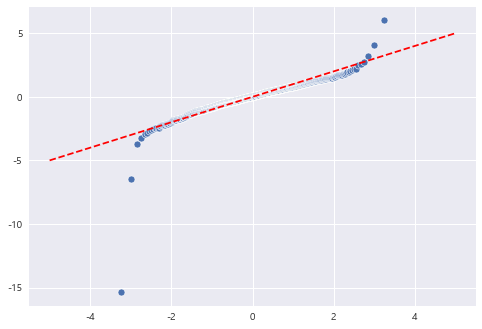

In [90]:
import scipy.stats

# 잔차 = 실제값 - 예측값 
residual = y_test - lr_pred_test

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-5, 5], [-5, 5], '--', color='red')

In [91]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.845268964767456, pvalue=1.0629866844791325e-32)

잔차의 정규성의 경우 Q-Q plot을 통해서는 45도에 가깝다는 것을 알 수 있으며

샤키로 검정 값에 따라서 통계적으로 유의미하며 그 값 또한 잔차가 정규성을 가진다고 할 수 있다

따라서 잔차의 분포가 정규분포와 비슷한 형태이기 때문에 잔차의 정규성이 만족한다고 할 수 있다.

## 잔차의 등분산성

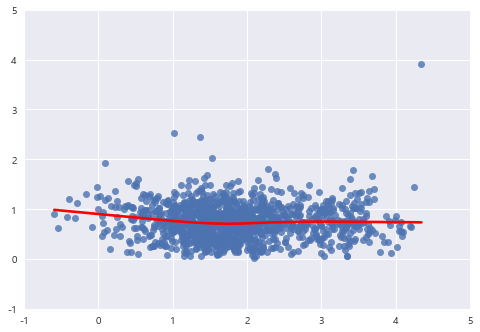

In [92]:
# 잔차의 등분산성 
sns.regplot(lr_pred_test, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

잔차의 등분산성은 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정하에 빨간 선이 수평에 가까울수록 잔차의 등분산성이 만족한다는 것을 의미한다.

위 그래프를 보면 빨간 선이 수평에 가까우며 잔차의 등분산성을 만족한다는 것을 확인할 수 있다.

## 설명변수 간 독립성 VIF

In [93]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF 계산 모델
model = ols('log_Price ~ log_Kilometers_Driven + log_Mileage + log_Engine + log_Power + log_New_Price',
            num_data)

res = model.fit()

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,log_Kilometers_Driven,1.093346
1,log_Mileage,1.822384
2,log_Engine,5.685183
3,log_Power,5.799141
4,log_New_Price,2.401691


개인적으로 설명변수간의 다중공선성(독립변수간의 영향력)은 모델 예측의 성능 향상에 도움을 준다고 생각한다.

하지만 실험 또는 연구 논문 같은 경우에는 다중공선성을 고려해야 한다.

만약에 모델 자체의 성능을 높이는데만 초점을 맞춘다면 다중공선성을 크게 고려하지 않아도 된다고 생각한다.

현재 모델의 설명변수가 독립성을 판단해보면 크게 다중공선성의 문제를 가지는 변수는 없는 것으로 판단된다.

# 결론

* Target
 - log_Price를 사용했으며 추후에 exp를 통하여 원래 값으로 스케일링을 해주는 과정이 필요하다.

* feature
 - 수치형 변수의 경우 로그 변화한 ['log_Kilometers_Driven', 'log_Mileage', 'log_Engine', 'log_Power', 'log_New_Price', 'log_Price'] 사용했다.
 - 범주형 변수의 경우 원핫 인코딩하여 ['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'] 사용했다.

Model의 경우

|**모델의 종류**      |**R-squared**|**MSE**|
|:---------------------:|:---:|:---:|
|**Linear Regression**|0.9261|0.0559|
|**Ridge**            |0.9234|0.0579|
|**Lasso**            |0.9205|0.0601|
|**ElasticNet**       |0.8788|0.0917|

Linear Regression, Ridge, Lasso, ElasticNet 순으로 모델의 성능이 좋다는 것을 확인할 수 있다.

이 중에서 개인적인 판단으로는 범주형 변수의 원핫인코딩에 의하여 피쳐의 개수가 상당히 많이 증가하였기 때문에 L1 규제와 L2 규제를 함께 적용하는 ElasticNet을 하이퍼 파라미터 튜닝 후에 활용하는 것이 좋다고 판단된다.

하지만 본 조사의 경우 가장 성능이 좋았던 Linear Regression을 사용했고

결과는 회귀분석 가정을 모두 만족하는 타당한 Model이 만들어졌음을 확인할 수 있다.